In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
import matplotlib.pyplot as plt
# %matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

# dss_team_project

## [House Price: Adcanced Regressin Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
+ team lucky
  + 권순호, 지성민, 김동현

+ Goal
	* it is your job to predict the sales price for each house.
	* For each Id in test set, you must predict the value of the SalePrice variable.

+ Metric
	* submissions are evaluated in Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.(Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally)

+ porject index
	* ~ 10/10 EDA(Exploratory data analysis)
	* ~ 10/14 Feature selection
	* ~ 10/16 Modeling(OLS Regression)
	* ~ 10/21 Model selection
	* ~ 10/25 Project 발표


### EDA 
+ 변수 탐색 및 분류
  + 변수가 무엇을 의미하는지 파악
  + 상관관계가 없는 변수는 어떤것이 있나?
  + 판매가격과 상관관계가 없는 변수는 어떻게 처리할 것인가?  #오탈자 수정
  + 의미없는값, 전처리가 필요한 값들을 선별및 가공하자


+ EDA 담당 Column
  + 김동현 : 01. MSSubClass ~ 28. Foundation (28개)   
  + 지성민 : 29. BsmtQual ~ 54. Functional (26개)  
  + 권순호 : 55. Fireplaces ~ 78. SalesCondition (24개)  
  

In [1]:
df = pd.read_csv('./data/train.csv')
df = df.set_index("Id")

df_column=list(df.keys())
df_column.remove('SalePrice')

In [2]:
dfX = pd.DataFrame(df, columns = df_column)
dfy = pd.DataFrame(df, columns=['SalePrice'])
df = pd.concat([dfX, dfy], axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   
4          Lvl    AllPub    Corner    ...            0    NaN   NaN   
5          Lvl    AllPub       FR2    ...            0    NaN   NaN   

   MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                         
1          NaN       0      2    2008        WD         Normal     208500  
2          NaN       0      5    2007        WD         Normal     181500  
3          NaN       0      9    2008        WD         Normal     223500  
4          NaN       0      2    2006        WD        Abnorml     140000  
5          NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [3]:
df.keys()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# 개인작업_Column 01.~28 분석

## 양적 변수와 카테고리 변수 분류
* MSSubClass 를 카테고리변수로 이동
* YearRemodAdd 와 MasVnrArea 를 양적변수로 이동

In [4]:
# 양적 변수
cols_real_work1 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'SalePrice']

# 카테고리 변수
cols_cat_work1 = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                  'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                  'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation']
            
print(len(cols_real_work1))
print(len(cols_cat_work1))


8
20


In [5]:
df_scatr= df.loc[:,cols_real_work1]

print (df_scatr.columns)
print (df_scatr.head())

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'SalePrice'],
      dtype='object')
    LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                            
1          65.0     8450            7            5       2003          2003   
2          80.0     9600            6            8       1976          1976   
3          68.0    11250            7            5       2001          2002   
4          60.0     9550            7            5       1915          1970   
5          84.0    14260            8            5       2000          2000   

    MasVnrArea  SalePrice  
Id                         
1        196.0     208500  
2          0.0     181500  
3        162.0     223500  
4          0.0     140000  
5        350.0     250000  


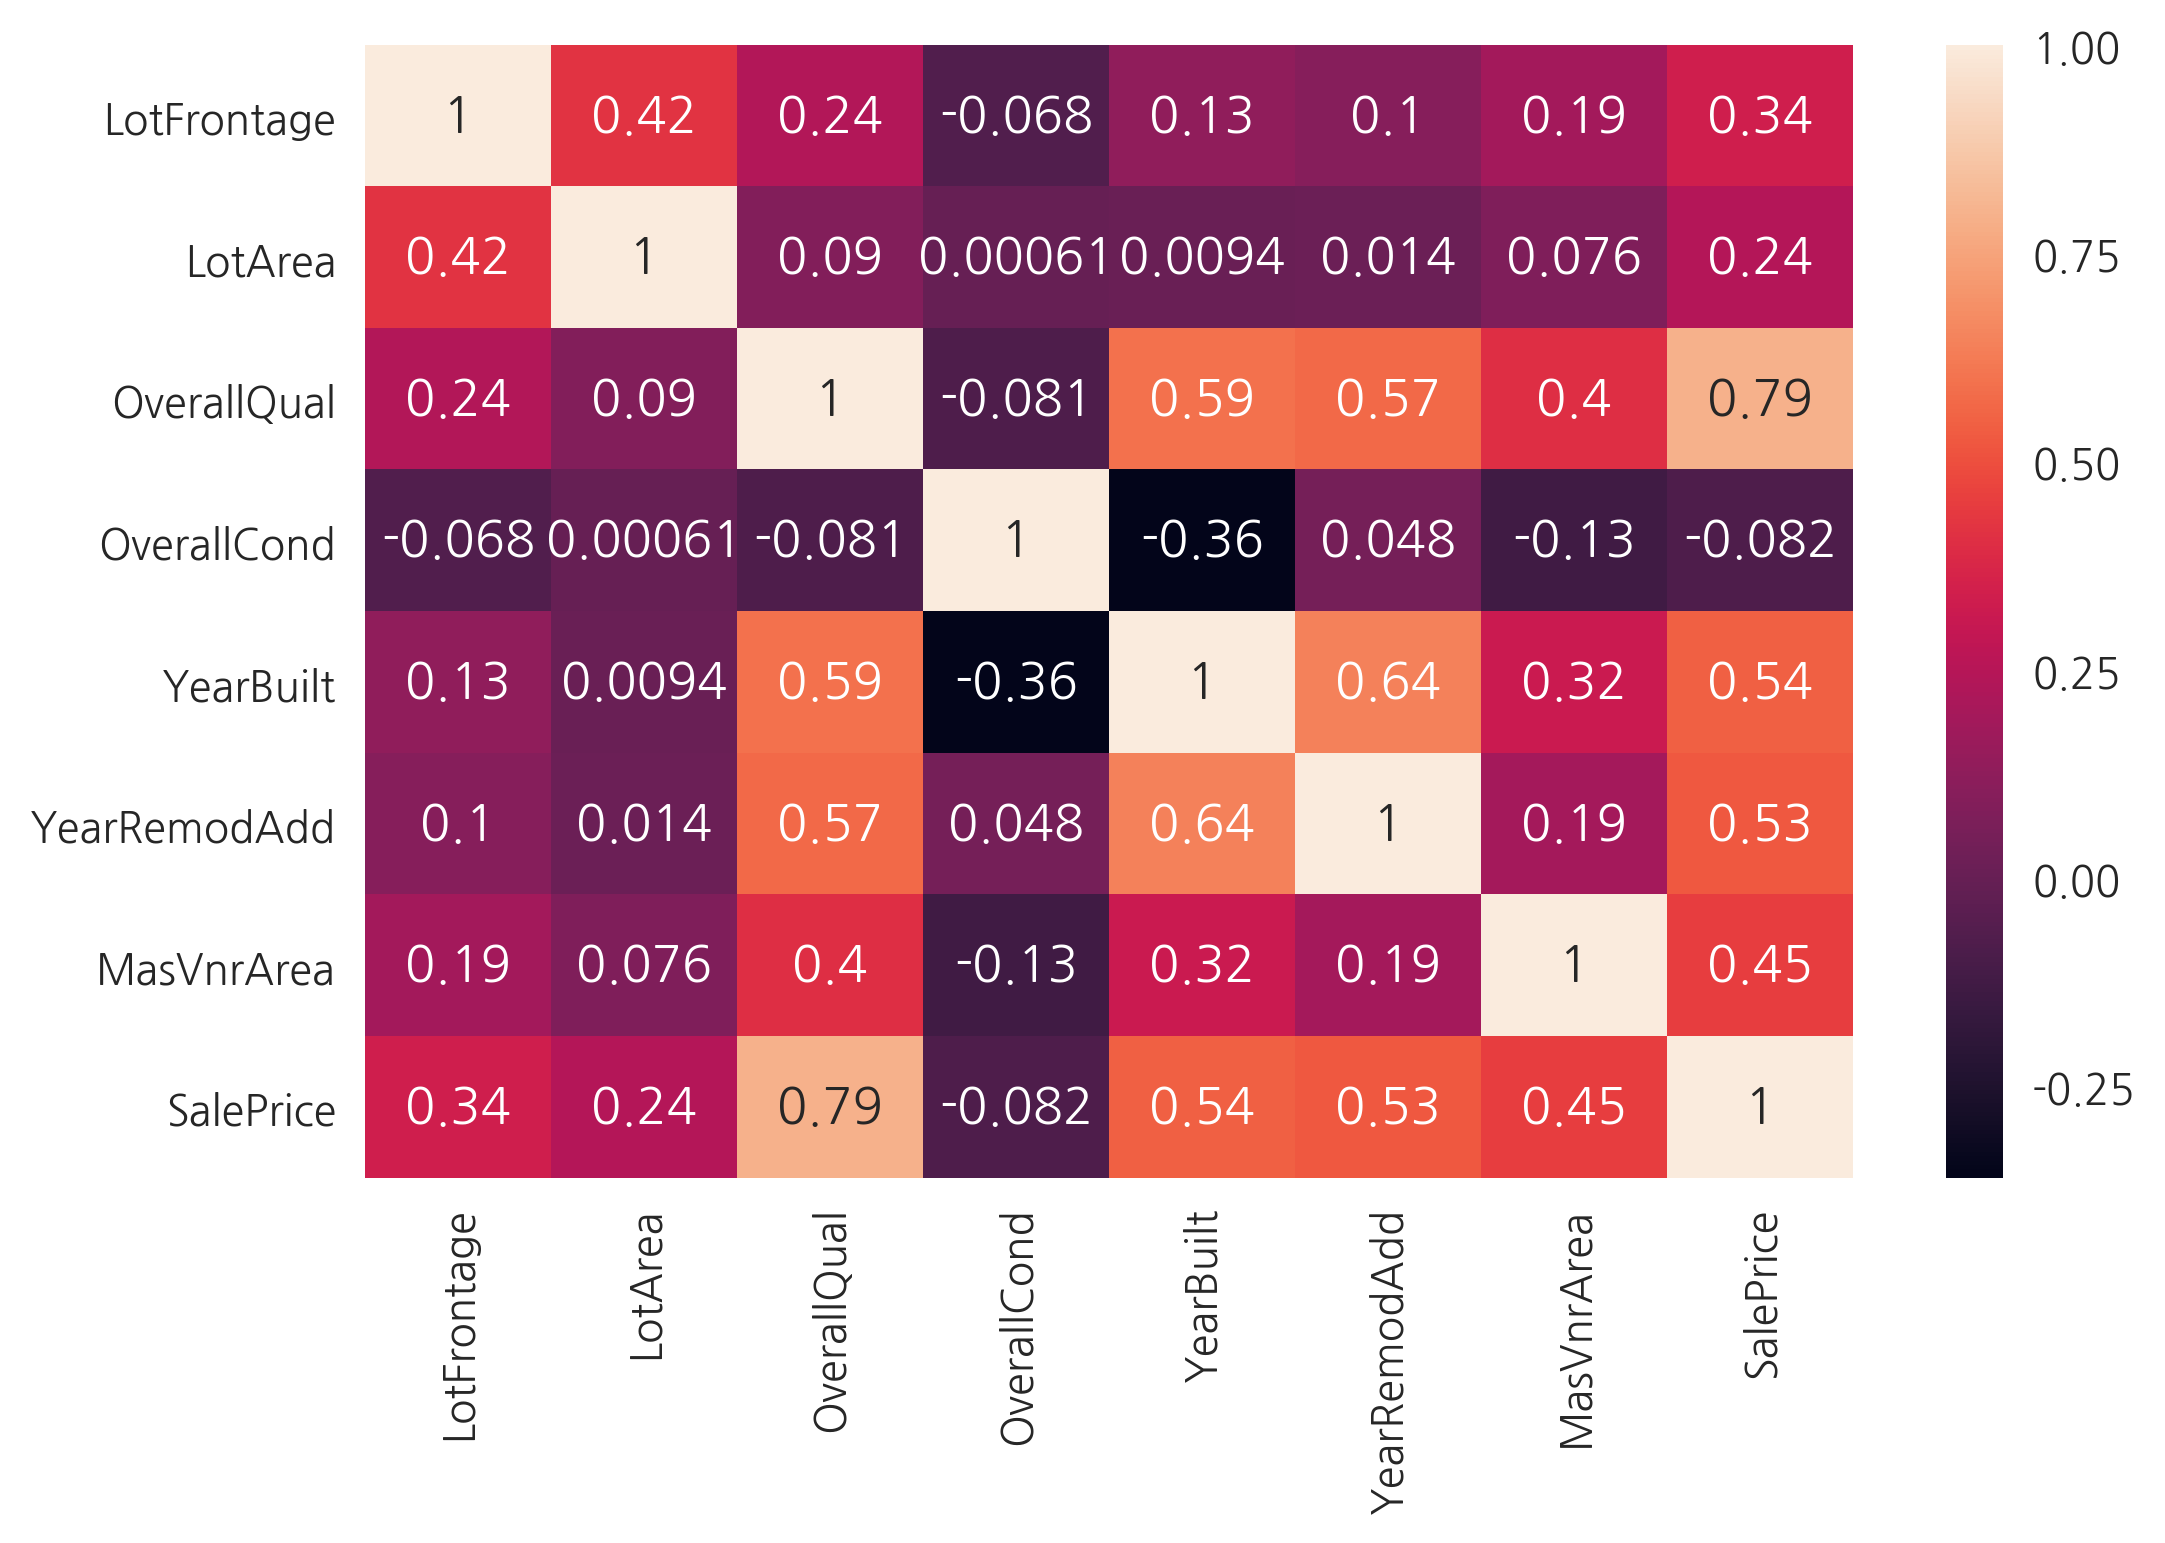

In [6]:
compare_feature = df_scatr.corr()
draw = sns.heatmap(compare_feature, annot = True)
plt.show(draw)

In [ ]:
cols_real_work1_use = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'SalePrice']
df_scatr1= df.loc[:,cols_real_work1_use]

In [ ]:
compare_feature1 = df_scatr1.corr()
draw = sns.heatmap(compare_feature1, annot = True)
plt.show(draw)

In [ ]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df_scatr1.SalePrice, df_scatr1[cols_real_work1_use[:3]]], axis=1) ,size=1)
plt.show()

## 양적변수 분석결과
#### 분석대상 : 8 개의 변수 (LotFrontage, LotArea, OverallQual, OverAllCond, YearBuilt, YearRemodAdd, MasVnrArea)

#### 상관계수 결과
* LotFrontage : 0.34   | 배제
* LotArea : 0.24       | 배제
* OverallQual : 0.79   | 선택
* OverAllCond : -0.082 | 배제
* YearBuilt : 0.54     | 선택
* YearRemodAdd : 0.53  | 선택
* MasVnrArea : 0.45    | 선택? 배제?

### 문제제기

 ##### LotFrontage
* LotFrontage 의 가격-상관계수는 0.34임. 하지만, 자료자체에 0 값이 많아서 왜곡이 발생하였을 가능성 존재함. 
* 이를 해결하기 위해 0이 포함된 행을 제거하고, 다시 상관관계를 구해서 실제로 무의미한 변수인지 확인하는 작업이 필요할 듯.

##### YearBuilt 와 YearRemodAdd 
* 개념상으로 YearRemodAdd는 리모델링을 하지 않았을 경우는 YearBuilt의 값을 쓰기 때문에 YearBuilt의 내용을 포함한 더 업데이트된 자료라고 보여짐. 
* 그런데 오히려 상관계수는 0.01 더 낮음. 
* 이를 해결하기 위해 YearBuilt 와 YearRemodAdd를 병합할지, 아니면 양쪽 중 하나만 쓸지, 아니면 조작없이 둘 다 쓸지 결정할 필요 있음.
* YearRemodAdd 의 상관계수가 0.01 더 낮은 이유에 대해서 고찰 필요할 듯.

##### MasVnrArea
* Pairplot 이 안그려짐. Error 이유는 맥스값이 민값보다 낮다고 함.
* 정확한 원인은 모르겠지만 Value에 0 이 많아서 그렇지 않을까 추측함. 
* 이로 인한 왜곡가능성의 존재? 상관도도 0.45 임. 버릴까?


In [ ]:
cols_cat_work1 = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                 'ExterQual', 'ExterCond', 'Foundation', 'SalePrice']

cols_cat_work11 = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'SalePrice']

cols_cat_work12 = ['HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                 'ExterQual', 'ExterCond', 'Foundation', 'SalePrice']
                  

## 질적변수의 내용들을 숫자로 바꾸는 전처리작업 필요함!!  with Pandas??
#### 변경코드
* MSZoning : A - 1, C - 2, FV - 3, I - 4, RH - 5, RL - 6, RP - 7, RM - 8
* Lotshape : Reg - 1, IR1 - 2, IR2 - 3, IR3 - 4
* LandContour : Lvl - 1, Bnk - 2, HLS - 3, Low - 4
* Lotconfig : Inside - 1, Corner - 2, CulDSac - 3, FR2 - 4, FR3 - 5
* LandSlope : Gtl - 1, Mod - 2, Sev - 3
* Neighborhood : 
* Condition1 : Artery - 1, Feedr - 2, Norm - 3, RRNn - 4, RRAn - 5, PosN - 6, PosA - 7, RRNe - 8, RRAe - 9
* Condition2 : Artery - 1, Feedr - 2, Norm - 3, RRNn - 4, RRAn - 5, PosN - 6, PosA - 7, RRNe - 8, RRAe - 9
* BldgType : 1Fam - 1, 2FmCon - 2, Duplx - 3, TwnhsE - 4, TwnhsI - 5
* HouseStyle : 1Story - 1, 1.5Fin - 2, 1.5Unf - 3, 2Story - 4, 2.5Fin - 5, 2.5Unf - 6, SFoyer - 7, SLvl - 8
* RoofStyle : Flat - 1, Gable - 2, Gambrel - 3, Hip - 4, Mansard - 5, Shed - 6
* RoofMatl : ClyTile - 1, CompShg - 2, Membran - 3, Metal - 4, Roll - 5, Tar&Grv - 6, WdShake - 7, WdShngl - 8
* Exterior1st : AsbShng - 1, AsphShn - 2, BrkComm - 3, BrkFace - 4, CBlock - 5, CemntBd - 6, HdBoard - 7, ImStucc - 8, MetalSd - 9, Other - 10, Plywood - 11, PreCast - 12, Stone - 13, Stucco - 14, VinylSld - 15, Wd Sdng - 16, WdShing - 17
* Exterior2nd : AsbShng - 1, AsphShn - 2, BrkComm - 3, BrkFace - 4, CBlock - 5, CemntBd - 6, HdBoard - 7, ImStucc - 8, MetalSd - 9, Other - 10, Plywood - 11, PreCast - 12, Stone - 13, Stucco - 14, VinylSld - 15, Wd Sdng - 16, WdShing - 17
* MasVnrType : BrkCmn - 1, BrkFace - 2, CBlock - 3, None - 4, Stone - 5
* ExterQual : EX - 5, Gd - 4, TA - 3, Fa - 2, Po - 1
* ExterCond : EX - 5, Gd - 4, TA - 3, Fa - 2, Po - 1
* Foundation : BrkTil - 1, CBlock - 2, PConc - 3, Slab - 4, Stone - 5, Wood - 6

In [ ]:
df_scatr_cat = df.loc[:, cols_cat_work1]
df_scatr_cat_1 = df.loc[:, cols_cat_work11]
df_scatr_cat_2 = df.loc[:, cols_cat_work12]

In [ ]:
compare_feature_cat_1 = df_scatr_cat_1.corr()
draw = sns.heatmap(compare_feature_cat_1, annot = True)
plt.show(draw)

In [ ]:
compare_feature_cat_2 = df_scatr_cat_2.corr()
draw = sns.heatmap(compare_feature_cat_2, annot = True)
plt.show(draw)

In [ ]:
# 논리적 상관관계가 높은 이웃지역변수를 박스플롯화

def display_boxplot(feature):
    with plt.style.context(('seaborn-white')):
        sns.boxplot(x=df_scatr_cat[feature], y=df_scatr_cat['SalePrice'], linewidth=1, palette="Set1", width=0.5)
    plt.show()

        
display_boxplot('Neighborhood')


* 지역별로 유의미한 평균가격 차이가 보임. 평균가격대가 비슷한 지역들을 그룹화하여 넘버링할 필요 있을 듯.(ex. low=1~12, mid=13~24, high=25~27)

### 질적변수 분석결과

* Street : 비포장이 1030개 데이터 중 2개 밖에 없음. 배제해도 되지 않을까?
* Alley : 입력된 데이터가 너무 적음. 분석이 불가능할 듯.
* utilities : 전체가 단일value임. 배제

# 개인작업_Column 55. Fireplaces ~ 78. SalesCondition (24개)

In [7]:
df.keys()[56 : -1]

Index(['FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
# 양적 변수
cols_real_sooner = [ "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                    "ScreenPorch", "PoolArea", "MiscVal",'SalePrice']

# 카테고리 변수
cols_cat_sooner = ["Fireplaces","FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", 
                  "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "MoSold", 
                   "YrSold",  "SaleType", "SaleCondition"]
            
print(len(cols_real_sooner))
print(len(cols_cat_sooner))

9
16



#### 벽난로
Fireplaces : 벽난로 갯수

FireplaceQu : 벽난로의 품질 
* Ex Excellent - Exceptional Masonry Fireplace  
* Gd Good - Masonry Fireplace in main level  
* TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement  
* Fa Fair - Prefabricated Fireplace in basement  
* Po Poor - Ben Franklin Stove    
* NA No Fireplace   

#### 주차장
GarageType : 주차장 위치 (1개 이상, 집에 붙어, 지하창고 등)
* 2Types More than one type of garage  
* Attchd Attached to home  
* Basment Basement Garage  
* BuiltIn Built-In (Garage part of house - typically has room above garage)  
* CarPort Car Port  
* Detchd Detached from home  
* NA No Garage  

GarageYrBlt : 주차장이 만들어진 연도

GarageFinish : 주차장 인테리어 마감 정도 (마감됨, 거칠게 마감됨, 마감안됨, 주차장없음)
* Fin Finished  
* RFn Rough Finished  
* Unf Unfinished  
* NA No Garage  

GarageCars : 주차장의 차량 수용능력  

GarageArea : 주차장의 넓이 (평방 피트)

GarageQual : 주차장의 품질 (탁월, 좋음, 평균, 다소, 나쁨, 주차장 없음)
* Ex Excellent  
* Gd Good  
* TA Typical/Average  
* Fa Fair  
* Po Poor  
* NA No Garage  

GarageCond : 주차장의 상태 (탁월, 좋음, 평균, 다소, 나쁨, 주차장 없음)
* Ex Excellent  
* Gd Good  
* TA Typical/Average  
* Fa Fair  
* Po Poor  
* NA No Garage  

#### 배란다
PavedDrive : 포장도로 여부 (포장됨, 부분 포장, 먼지/자갈)
* Y Paved  
* P Partial Pavement  
* N Dirt/Gravel  

WoodDeckSF : 나무 갑판지역의 넓이 (평방 피트)

OpenPorchSF : 개방된 배란다-현관의 넓이 (평방 피트)  

EnclosedPorch : 내부 배란다-현관의 넓이 (평방 피트)

3SsnPorch : 3계절 배란다-현관의 넓이 (평방 피트)

ScreenPorch : 스크린 배란다-현관의 넓이 (평방 피트)

#### 수영장
PoolArea : 수영장 넓이 (평방 피트)

PoolQC : 수영장 품질
* Ex Excellent  
* Gd Good  
* TA Average/Typical  
* Fa Fair  
* NA No Pool  

#### 담장
Fence : 담장 품질
* GdPrv Good Privacy  
* MnPrv Minimum Privacy  
* GdWo Good Wood  
* MnWw Minimum Wood/Wire  
* NA No Fence  

#### 기타
MiscFeature : 기타 요소 (엘리베이터, 2층차고, 기타, 테니스코트, 등)
* Elev Elevator  
* Gar2 2nd Garage (if not described in garage section)  
* Othr Other  
* Shed Shed (over 100 SF)  
* TenC Tennis Court  
* NA None  

MiscVal : 기타 요소의 가치

#### 구매 날짜
MoSold : 구매 월

YrSold : 구매 년

#### 판매
SaleType : 판매 형식 (재래식 보증증서, 현금 보증증서, 대출 보증증서, 건설 후 판매, 등)
* WD Warranty Deed - Conventional  
* CWD Warranty Deed - Cash  
* VWD Warranty Deed - VA Loan  
* New Home just constructed and sold  
* COD Court Officer Deed/Estate  
* Con Contract 15% Down payment regular terms  
* ConLw Contract Low Down payment and low interest  
* ConLI Contract Low Interest  
* ConLD Contract Low Down  
* Oth Other  

SaleCondition : 판매조건 (일반판매, 비정상판매-압류, 급매, 인접토지구매, 할당, 가족간거래, 건축미완공)
* Normal Normal Sale  
* Abnorml Abnormal Sale - trade, foreclosure, short sale  
* AdjLand Adjoining Land Purchase  
* Alloca Allocation - two linked properties with separate deeds, typically condo with a garage unit  
* Family Sale between family members  
* Partial Home was not completed when last assessed (associated with New Homes)  

In [28]:
# 양적 변수의 df
df_scatr_sooner = df.loc[:, cols_real_sooner]

print (df_scatr_sooner.keys())
df_scatr_sooner.tail(20)

Index(['GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')


GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                    
1423         420         140            0              0          0   
1425         484         316           28              0          0   
1427         525         171          132              0          0   
1431         372         100           40              0          0   
1435         484         295           41              0          0   
1436         462           0           36              0          0   
1437         528           0            0              0          0   
1438         774           0           66              0        304   
1440         550           0           88            216          0   
1441         672         431            0              0          0   
1442         420         149            0              0          0   
1443         812         168           52              0          0   
1447         312         261           39              0          0   
1448         556           0           65              0          0   
1450           0           0            0              0          0   
1451           0          32           45              0          0   
1452         840           0           36              0          0   
1454           0          36           56              0          0   
1455         400           0          113              0          0   
1459         240         366            0            112          0   

      ScreenPorch  PoolArea  MiscVal  SalePrice  
Id                                               
1423            0         0        0     136500  
1425            0         0        0     144000  
1427            0         0        0     271000  
1431            0         0        0     192140  
1435            0         0        0     160000  
1436            0         0        0     174000  
1437            0         0        0     120500  
1438            0         0        0     394617  
1440            0         0        0     197000  
1441            0         0        0     191000  
1442            0         0        0     149300  
1443            0         0        0     310000  
1447            0         0        0     157900  
1448            0         0        0     240000  
1450            0         0        0      92000  
1451            0         0        0     136000  
1452            0         0        0     287090  
1454            0         0        0      84500  
1455            0         0        0     185000  
1459            0         0        0     142125

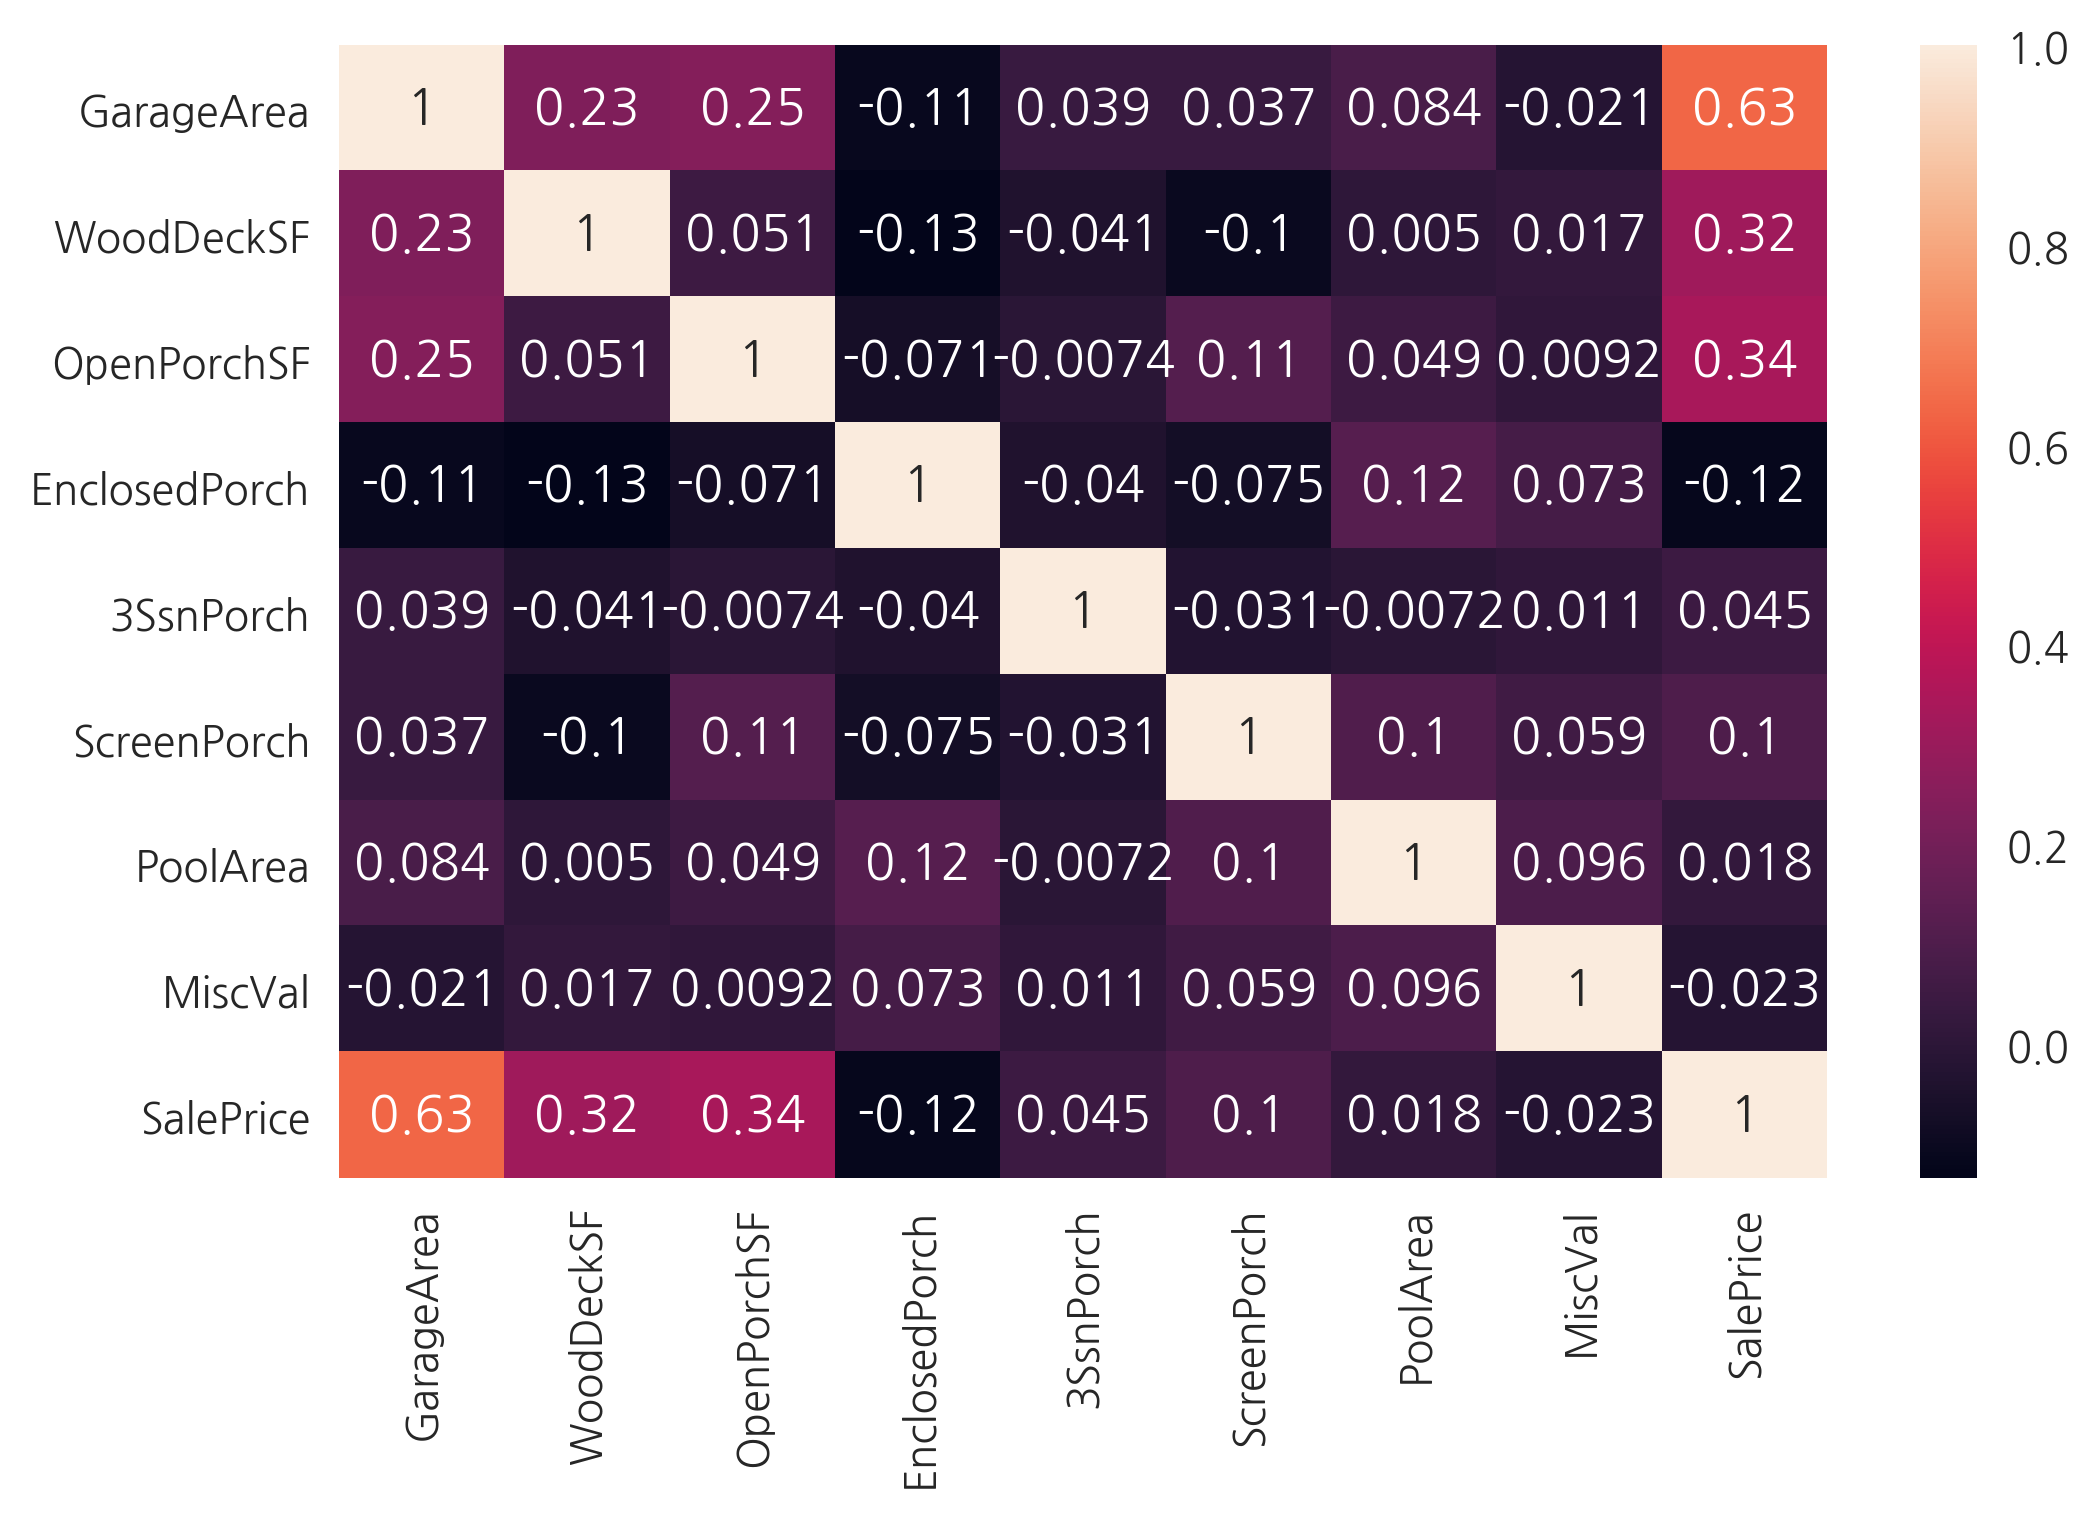

In [29]:
# 양적 변수의 corr
compare_feature_sooner = df_scatr_sooner.corr()
draw = sns.heatmap(compare_feature_sooner, annot = True)
plt.show(draw)

In [30]:
# SalePrice 와의 상관계수만 따로 모음
compare_feature_sooner.loc['SalePrice', :]

GarageArea       0.634201
WoodDeckSF       0.315122
OpenPorchSF      0.338569
EnclosedPorch   -0.119878
3SsnPorch        0.045000
ScreenPorch      0.099935
PoolArea         0.017794
MiscVal         -0.022613
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [33]:
# 필터 0.4 이상 -0.4 이하인것
compare_feature_fillter = (compare_feature_sooner.SalePrice > 0.4) | (compare_feature_sooner.SalePrice < -0.4)
# 상관계수가 0.4이상 -0.4 이하인 변수들
cols_real_sooner_use = compare_feature_sooner.loc[compare_feature_fillter , compare_feature_fillter]
# list(cols_real_sooner_use.keys()) 변수들 리스트

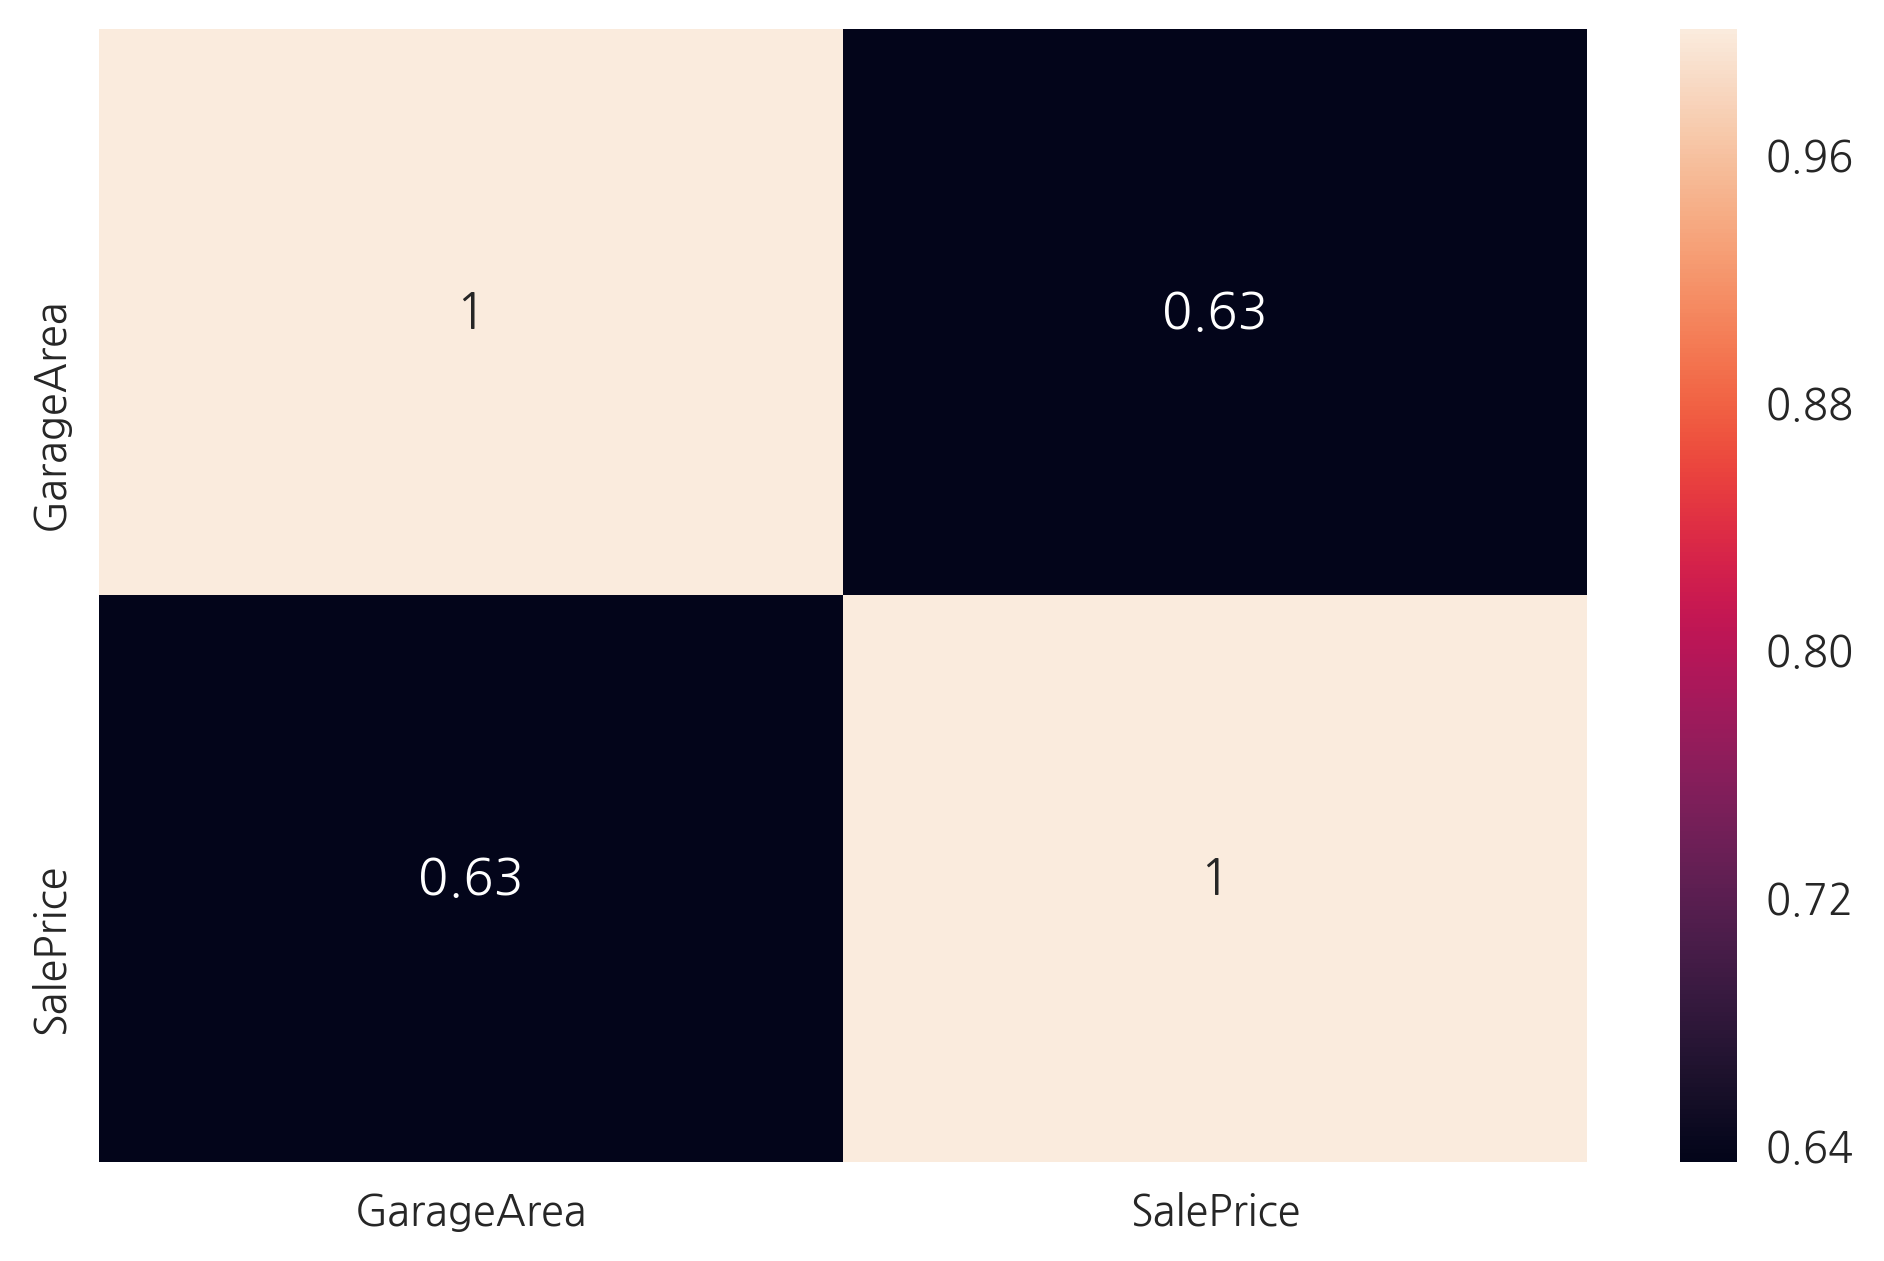

In [34]:
# 이미 구한 상관계수 df에서 쓸것만 뽑아옴 
compare_feature_sooner_use = compare_feature_sooner.loc[list(cols_real_sooner_use.keys()), list(cols_real_sooner_use.keys())]
draw_cols_use = sns.heatmap(compare_feature_sooner_use, annot = True)
plt.show(draw_cols_use)

In [35]:
# 필터 적용된 변수들의 df
cols_real_sooner_use_df = df.loc[:, list(cols_real_sooner_use.keys())]
cols_real_sooner_use_df.tail()

cols_real_use = list(cols_real_sooner_use.keys())
cols_real_use

['GarageArea', 'SalePrice']

In [36]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df_scatr1_sooner.SalePrice, list(cols_real_sooner_use.keys())[:3]], axis=1) ,size=1)
plt.show()

NameError: name 'df_scatr1_sooner' is not defined

## 양적변수 분석결과
#### 분석대상 : 8 개의 변수 ("GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",'SalePrice')

#### 상관계수 결과
* GarageArea    :   0.634201 | 선택  
* WoodDeckSF    :   0.315122 | 선택? 배제?  
* OpenPorchSF   :   0.338569 | 선택? 배제?  
* EnclosedPorch :  -0.119878 | 배제  
* 3SsnPorch     :   0.045000 | 배제  
* ScreenPorch   :   0.099935 | 배제 
* PoolArea      :   0.017794 | 배제 
* MiscVal       :  -0.022613 | 배제 

### 문제제기 

 ##### GarageYrBlt, GarageCars, GarageArea
* 3가지 변수모두 비슷한 의미의 변수 한가지 변수로 합칠수 있을것이라고 생각됨
* GarageArea와 GarageCars두 변수의 상관 관계가 0.88로 높음
* GarageArea가 GarageCars를 포함하는 변수라고 생각됨 
* 하지만  GarageCars의 상관 계수가 더 높음 둘중 어떤것을 쓸지 골라야함

##### WoodDeckSF 와 OpenPorchSF
* 상관 계수가 애매하지만 두가지 변수 모두 평방 피트를 의미하는걸로 보아 합치면 더 의미있는 변수가 될것 같음
    * 두 변수의 상관계수가 너무 낮으므로 합칠수는 없음.


# 양적변수 OLS
+ 상관 계수를 기준으로 분석을 우선시 하되 모든데이터를 한번이상 돌려본다.


In [45]:
dfX0 = pd.DataFrame(df, columns=['GarageArea'])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(df, columns=["SalePrice"])

model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     691.7
Date:                Wed, 18 Oct 2017   Prob (F-statistic):          5.48e-117
Time:                        16:57:45   Log-Likelihood:                -12799.
No. Observations:                1030   AIC:                         2.560e+04
Df Residuals:                    1028   BIC:                         2.561e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.085e+04   4609.801     15.370      0.0

In [46]:
dfX0 = pd.DataFrame(df, columns=['GarageArea'])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(df, columns=["SalePrice"])

model = sm.OLS(dfy, dfX0)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     7945.
Date:                Wed, 18 Oct 2017   Prob (F-statistic):               0.00
Time:                        16:59:07   Log-Likelihood:                -12906.
No. Observations:                1030   AIC:                         2.581e+04
Df Residuals:                    1029   BIC:                         2.582e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GarageArea   358.5842      4.023     89.137      0.0

## 질적변수

In [35]:
cols_cat_sooner = ["Fireplaces","FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", 
                  "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "MoSold", 
                   "YrSold",  "SaleType", "SaleCondition"]

FireplaceQu(벽난로 품질) : EX - 5, Gd - 4, TA - 3, Fa - 2, Po - 1 NA -0(없는 경우 0 or Nan?)

GarageType : 주차장 위치 (1개 이상, 집에 붙어, 지하창고 등)
* 2Types More than one type of garage  
* Attchd Attached to home  
* Basment Basement Garage  
* BuiltIn Built-In (Garage part of house - typically has room above garage)  
* CarPort Car Port  
* Detchd Detached from home  
* NA No Garage  

GarageFinish(주차장 마감 정도) : Fin - 3, RFn - 2, Unf - 1, NA -0

GarageQual(주차장 품질) : EX - 5, Gd - 4, TA - 3, Fa - 2, Po - 1 Na - 0

GarageCond(주차장 상태)  : EX - 5, Gd - 4, TA - 3, Fa - 2, Po - 1 Na - 0

PavedDrive(포장도로 여부) : Y - 2, P - 1, N - 0

PoolQC(수영장 품질) : EX - 4, Gd - 3, TA - 2, Fa - 1, Na - 0

Fence(담장 품질) : GdPrv - 4, MnPrv - 3, GdWo - 2, MnWw - 1, NA - 0

MiscFeature : 기타 요소 (엘리베이터, 2층차고, 기타, 테니스코트, 등)
* Elev Elevator  
* Gar2 2nd Garage (if not described in garage section)  
* Othr Other  
* Shed Shed (over 100 SF)  (대부분 이것)
* TenC Tennis Court  
* NA None  

SaleType : 판매 형식 (재래식 보증증서, 현금 보증증서, 대출 보증증서, 건설 후 판매, 등)
* WD Warranty Deed - Conventional  
* CWD Warranty Deed - Cash  
* VWD Warranty Deed - VA Loan  
* New Home just constructed and sold  
* COD Court Officer Deed/Estate  
* Con Contract 15% Down payment regular terms  
* ConLw Contract Low Down payment and low interest  
* ConLI Contract Low Interest  
* ConLD Contract Low Down  
* Oth Other  

SaleCondition : 판매조건 (일반판매, 비정상판매-압류, 급매, 인접토지구매, 할당, 가족간거래, 건축미완공)
* Normal Normal Sale  
* Abnorml Abnormal Sale - trade, foreclosure, short sale  
* AdjLand Adjoining Land Purchase  
* Alloca Allocation - two linked properties with separate deeds, typically condo with a garage unit  
* Family Sale between family members  
* Partial Home was not completed when last assessed (associated with New Homes)  

In [112]:
# 변수를 바꾸는 함수 
def var_encoding(df, var_name, var_list, encode_var_list):
    for var, encode_var in zip(var_list, encode_var_list):
        df[var_name][df[var_name] == var] = encode_var 

In [37]:
df_scatr_cat = df.loc[:, cols_cat_sooner]
df_scatr_cat_1 = df.loc[:, cols_cat_sooner1]
df_scatr_cat_2 = df.loc[:, cols_cat_sooner2]

In [42]:
## FireplaceQu(벽난로 품질) : EX - 5, Gd - 4, TA - 3, Fa - 2, Po - 1 NA -0
## GarageFinish(주차장 마감 정도) : Fin - 3, RFn - 2, Unf - 1, NA -0
## GarageQual(주차장 품질) : EX - 5, Gd - 4, TA - 3, Fa - 2, Po - 1 Na - 0
## GarageCond(주차장 상태)  : EX - 5, Gd - 4, TA - 3, Fa - 2, Po - 1 Na - 0
# PavedDrive(포장도로 여부) : Y - 2, P - 1, N - 0
# PoolQC(수영장 품질) : EX - 4, Gd - 3, TA - 2, Fa - 1, Na - 0
# Fence(담장 품질) : GdPrv - 4, MnPrv - 3, GdWo - 2, MnWw - 1, NA - 0

grade = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
grade_num = [5, 4, 3, 2, 1, 0]
PoolQC = ['Ex', 'Gd', 'TA', 'Fa', 'NA']
PoolQC_num = [4, 3, 2, 1, 0]
GarageFinish = ["Fin", "RFn", "Unf", "NA"]
GarageFinish_num = [3, 2, 1, 0]
PavedDrive = ['Y', 'P', 'N']
PavedDrive_num = [2, 1, 0]
Fence = ["GdPrv", "MnPrv", "GdWo", "MnWw", "NA"]
Fence_num = [4, 3, 2, 1, 0]

var_encoding(df_scatr_cat_1, "FireplaceQu", grade, grade_num)
var_encoding(df_scatr_cat_1, "GarageFinish", GarageFinish, GarageFinish_num)
var_encoding(df_scatr_cat_1, "GarageQual", grade, grade_num)
var_encoding(df_scatr_cat_1, "GarageCond", grade, grade_num)
var_encoding(df_scatr_cat_1, "PavedDrive", PavedDrive, PavedDrive_num)
var_encoding(df_scatr_cat_1, "PoolQC", PoolQC, PoolQC_num)
var_encoding(df_scatr_cat_1, "Fence", Fence, Fence_num)

# 실제로 Na 라는 값이 없음
df_scatr_cat_1 = df_scatr_cat_1.fillna(0)
df_scatr_cat_1.tail(20)

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


SalePrice  FireplaceQu  GarageFinish  GarageQual  GarageCond  \
Id                                                                   
1423     136500            0             3           3           3   
1425     144000            3             1           3           3   
1427     271000            3             2           3           3   
1431     192140            4             3           3           3   
1435     160000            4             2           3           3   
1436     174000            4             2           3           3   
1437     120500            0             1           3           3   
1438     394617            4             3           3           3   
1440     197000            3             2           3           3   
1441     191000            4             3           3           3   
1442     149300            3             2           3           3   
1443     310000            5             3           3           3   
1447     157900            0             1           3           3   
1448     240000            3             2           3           3   
1450      92000            0             0           0           0   
1451     136000            0             0           0           0   
1452     287090            4             3           3           3   
1454      84500            0             0           0           0   
1455     185000            0             2           3           3   
1459     142125            0             1           3           3   

      PavedDrive  PoolQC  Fence  
Id                               
1423           2       0      0  
1425           2       0      2  
1427           2       0      0  
1431           2       0      0  
1435           1       0      0  
1436           2       0      4  
1437           2       0      2  
1438           2       0      0  
1440           2       0      0  
1441           2       0      0  
1442           2       0      0  
1443           2       0      0  
1447           1       0      0  
1448           2       0      0  
1450           2       0      0  
1451           2       0      0  
1452           2       0      0  
1454           2       0      0  
1455           2       0      0  
1459           2       0      0

cols_cat_sooner2 = ['SalePrice', "GarageType", "MiscFeature", 
                    "SaleType", "SaleCondition" ]

GarageType : 주차장 위치 (1개 이상, 집에 붙어, 지하창고 등)
* 2Types More than one type of garage  
* Attchd Attached to home  
* Basment Basement Garage  
* BuiltIn Built-In (Garage part of house - typically has room above garage)  
* CarPort Car Port  
* Detchd Detached from home  
* NA No Garage  

MiscFeature : 기타 요소 (엘리베이터, 2층차고, 기타, 테니스코트, 등)
* Elev Elevator  
* Gar2 2nd Garage (if not described in garage section)  
* Othr Other  
* Shed Shed (over 100 SF)  (대부분 이것)
* TenC Tennis Court  
* NA None  

SaleType : 판매 형식 (재래식 보증증서, 현금 보증증서, 대출 보증증서, 건설 후 판매, 등)
* WD Warranty Deed - Conventional  
* CWD Warranty Deed - Cash  
* VWD Warranty Deed - VA Loan  
* New Home just constructed and sold  
* COD Court Officer Deed/Estate  
* Con Contract 15% Down payment regular terms  
* ConLw Contract Low Down payment and low interest  
* ConLI Contract Low Interest  
* ConLD Contract Low Down  
* Oth Other  

SaleCondition : 판매조건 (일반판매, 비정상판매-압류, 급매, 인접토지구매, 할당, 가족간거래, 건축미완공)
* Normal Normal Sale  
* Abnorml Abnormal Sale - trade, foreclosure, short sale  
* AdjLand Adjoining Land Purchase  
* Alloca Allocation - two linked properties with separate deeds, typically condo with a garage unit  
* Family Sale between family members  
* Partial Home was not completed when last assessed (associated with New Homes)  

In [43]:
df_scatr_cat_1.corr()

SalePrice  FireplaceQu  GarageFinish  GarageQual  GarageCond  \
SalePrice      1.000000     0.542134      0.560317    0.280267    0.268731   
FireplaceQu    0.542134     1.000000      0.416860    0.251356    0.243327   
GarageFinish   0.560317     0.416860      1.000000    0.485304    0.485121   
GarageQual     0.280267     0.251356      0.485304    1.000000    0.958898   
GarageCond     0.268731     0.243327      0.485121    0.958898    1.000000   
PavedDrive     0.231872     0.157484      0.281045    0.341127    0.361110   
PoolQC         0.012587     0.050974      0.029728    0.015131    0.015356   
Fence         -0.167278    -0.046834     -0.143902    0.005856    0.000314   

              PavedDrive    PoolQC     Fence  
SalePrice       0.231872  0.012587 -0.167278  
FireplaceQu     0.157484  0.050974 -0.046834  
GarageFinish    0.281045  0.029728 -0.143902  
GarageQual      0.341127  0.015131  0.005856  
GarageCond      0.361110  0.015356  0.000314  
PavedDrive      1.000000  0.016630 -0.009822  
PoolQC          0.016630  1.000000  0.110794  
Fence          -0.009822  0.110794  1.000000

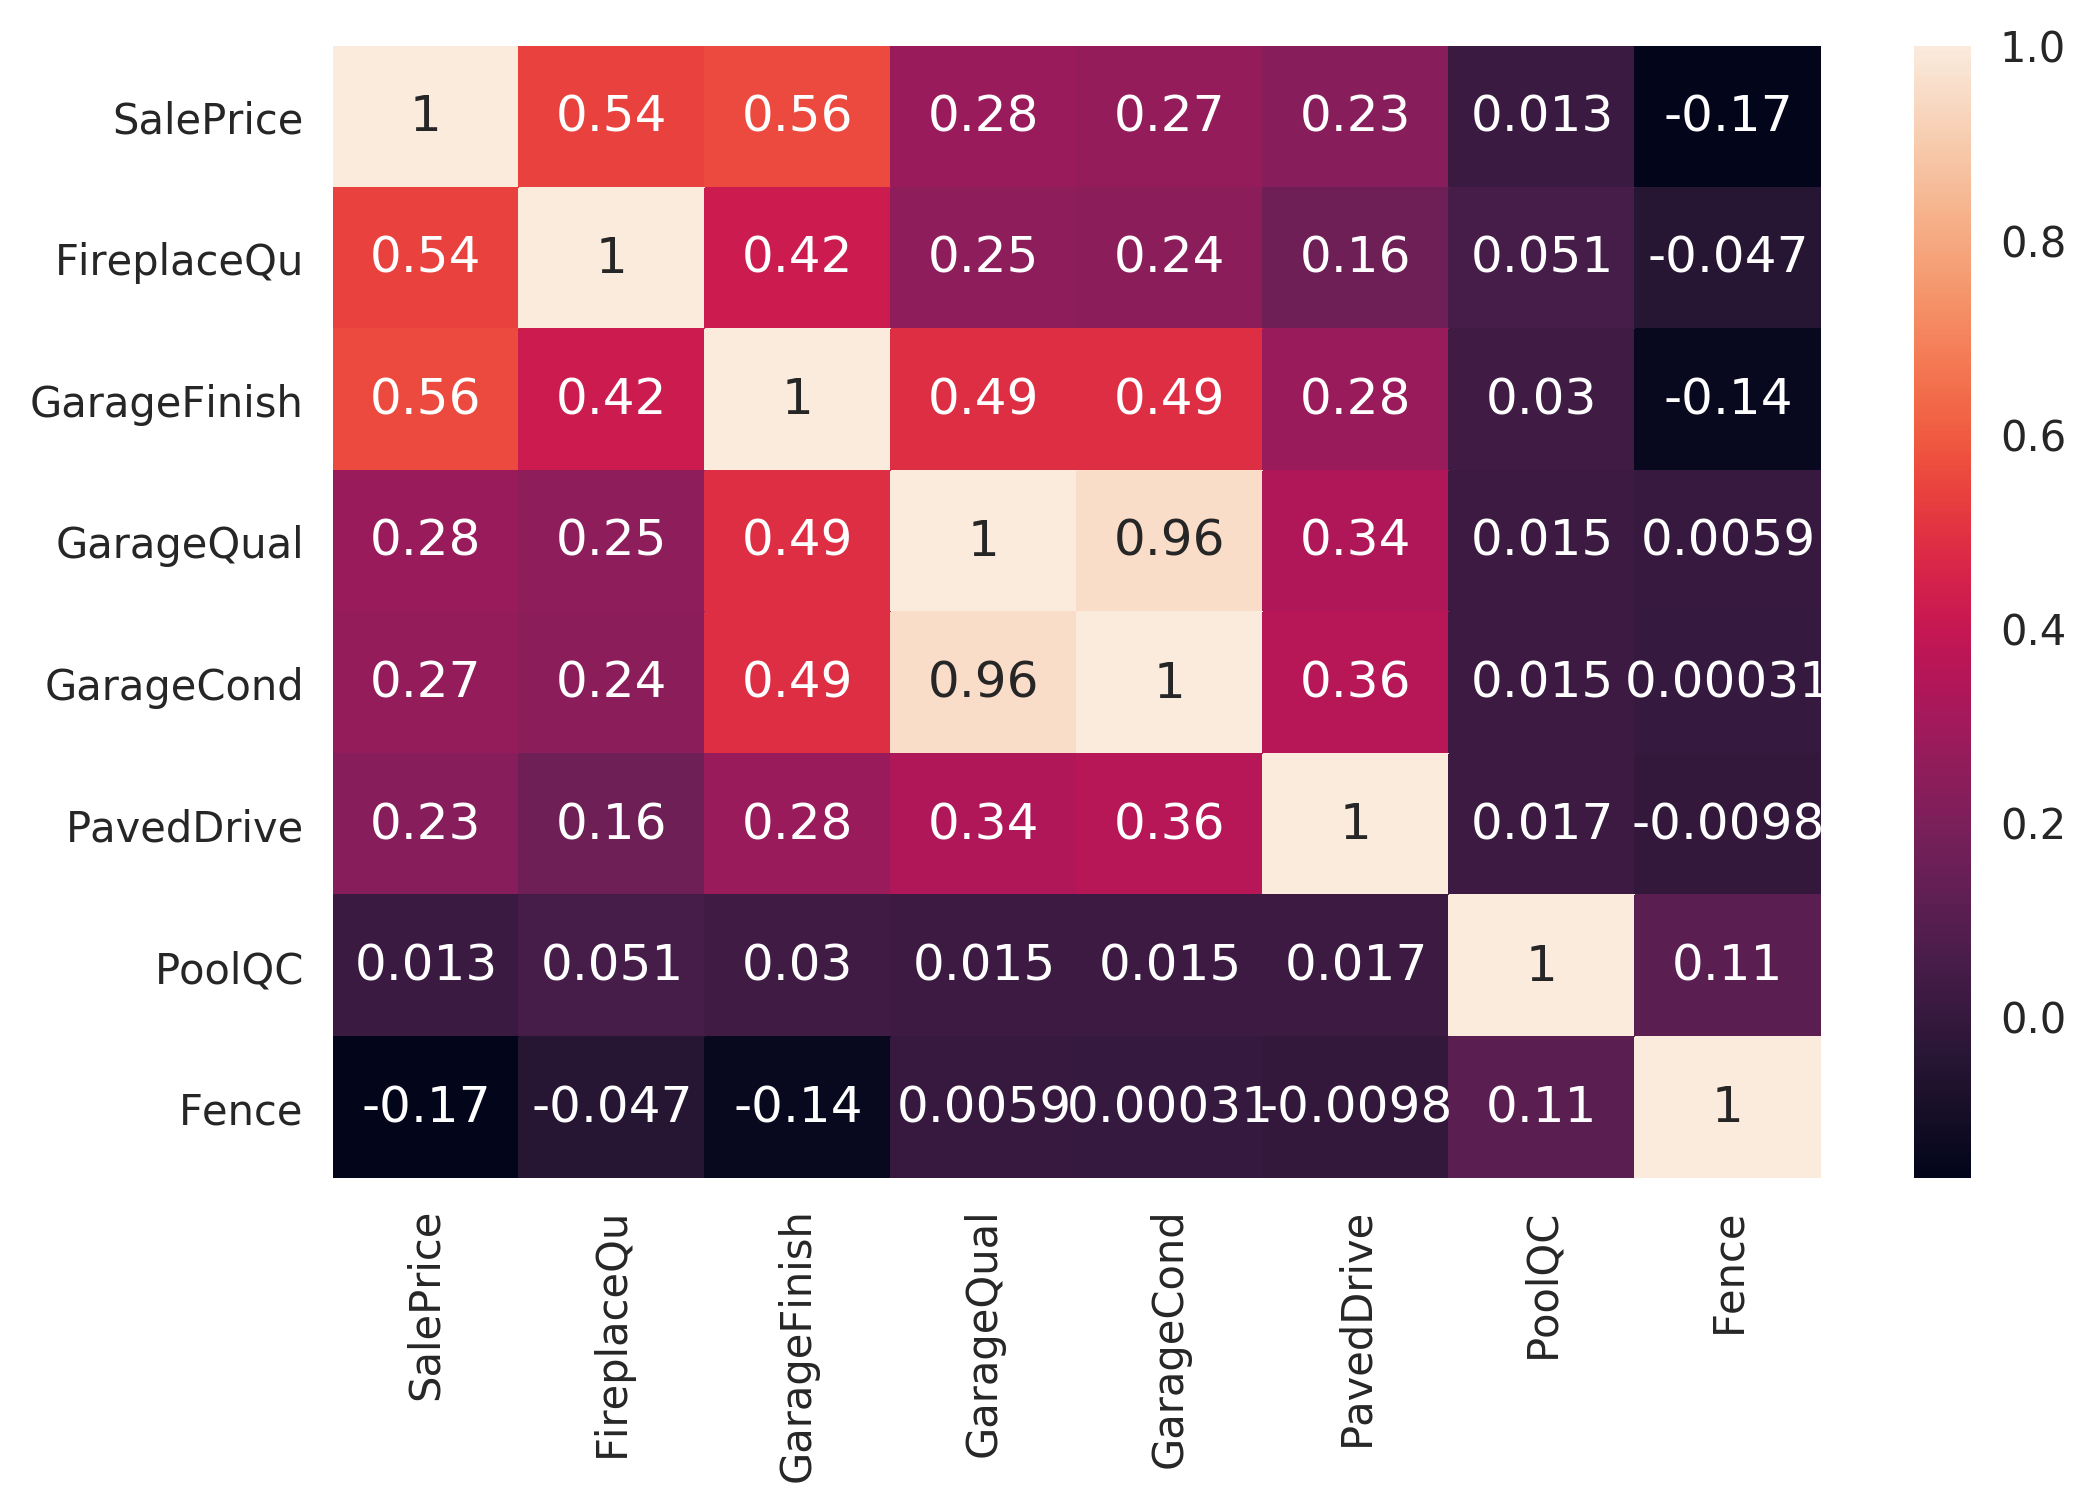

In [44]:
compare_feature_cat_1 = df_scatr_cat_1.corr()
draw = sns.heatmap(compare_feature_cat_1, annot = True)
plt.show(draw)

In [41]:
compare_feature_cat_1.loc['SalePrice', :]

SalePrice    1.0
Name: SalePrice, dtype: float64

In [ ]:
compare_feature_cat_2 = df_scatr_cat_2.corr()
draw = sns.heatmap(compare_feature_cat_2, annot = True)
plt.show(draw)

## 질적변수 분석결과
#### 분석대상 : 7 개의 변수 ("FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence")



#### 상관계수 결과
* FireplaceQu  :   0.542134 | 선택
* GarageFinish  :  0.560317 | 선택
* GarageQual     : 0.280267 | 배재
* GarageCond :      0.268731 | 배재
* PavedDrive :     0.231872 | 배재
* PoolQC      :    0.012587 | 배재
* Fence        :  -0.167278 | 배재

### 문제제기

#####  위의 7 개의 변수들
* 모두 등급을 나타내는 변수들이니깐 양적변수로 볼수 있을것 같음
* 양적변수로 이동후 그래프를 보면 비슷한 주제끼리 관계를 더 잘알수 있을것 같음

##### GarageCond , GarageQual와 GarageFinish
* 상관 계수가 애매하지만 두가지 변수 모두 주차장의 상태(품질)를 의미하는걸로 보아 합치면 더 의미있는 변수가 될것 같음
* GarageFinish가 GarageCond , GarageQual를 포함하는 개념인지 고민필요함
* 포함한다고 하면 확실하게 두개의 변수를 버릴수 있을것 같음

#### PavedDrive 
* 주차장 산태와 어느정도 상관관계가 있어보이지만 정확히 어떤 의미인지 고려해줘야함

### 질적변수를 양적변수로 이동
* 7 개의 변수 ("FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence")
* 모두 등급을 나타내는 변수이므로 상하관계가 있음
* 양적변수로 이동

In [114]:
cols_cat_sooner1 = ['SalePrice', "FireplaceQu", "GarageFinish", 
                     "GarageQual", "GarageCond", "PavedDrive", 
                     "PoolQC", "Fence"]
cols_real_sooner = ["Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", 
                   "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3S|snPorch", 
                   "ScreenPorch", "PoolArea", "MiscVal", "MoSold", 
                   "YrSold", 'SalePrice']
cols_real_var = ["Fireplaces", "FireplaceQu", "GarageYrBlt", "GarageFinish", 
                "GarageCars", "GarageArea", "GarageQual","GarageCond", "PavedDrive", 
                "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                 "ScreenPorch", "PoolArea", "PoolQC", "Fence", "MiscVal", "MoSold", 
                   "YrSold", 'SalePrice']
len(cols_real_var)

21

In [115]:
# 양적 변수의 df
df_scatr_sooner = df.loc[:, cols_real_var]

print (df_scatr_sooner.keys())
df_scatr_sooner.tail()

Index(['Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')


Fireplaces FireplaceQu  GarageYrBlt GarageFinish  GarageCars  \
Id                                                                   
1451           0         NaN          NaN          NaN           0   
1452           1          Gd       2008.0          Fin           3   
1454           0         NaN          NaN          NaN           0   
1455           0         NaN       2004.0          RFn           2   
1459           0         NaN       1950.0          Unf           1   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF    ...      \
Id                                                               ...       
1451           0        NaN        NaN          Y          32    ...       
1452         840         TA         TA          Y           0    ...       
1454           0        NaN        NaN          Y          36    ...       
1455         400         TA         TA          Y           0    ...       
1459         240         TA         TA          Y         366    ...       

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC Fence MiscVal  \
Id                                                                            
1451              0          0            0         0     NaN   NaN       0   
1452              0          0            0         0     NaN   NaN       0   
1454              0          0            0         0     NaN   NaN       0   
1455              0          0            0         0     NaN   NaN       0   
1459            112          0            0         0     NaN   NaN       0   

      MoSold  YrSold  SalePrice  
Id                               
1451       9    2009     136000  
1452       5    2009     287090  
1454       7    2006      84500  
1455      10    2009     185000  
1459       4    2010     142125  

[5 rows x 21 columns]

In [116]:
grade = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
grade_num = [5, 4, 3, 2, 1, 0]
PoolQC = ['Ex', 'Gd', 'TA', 'Fa', 'NA']
PoolQC_num = [4, 3, 2, 1, 0]
GarageFinish = ["Fin", "RFn", "Unf", "NA"]
GarageFinish_num = [3, 2, 1, 0]
PavedDrive = ['Y', 'P', 'N']
PavedDrive_num = [2, 1, 0]
Fence = ["GdPrv", "MnPrv", "GdWo", "MnWw", "NA"]
Fence_num = [4, 3, 2, 1, 0]

var_encoding(df_scatr_sooner, "FireplaceQu", grade, grade_num)
var_encoding(df_scatr_sooner, "GarageFinish", GarageFinish, GarageFinish_num)
var_encoding(df_scatr_sooner, "GarageQual", grade, grade_num)
var_encoding(df_scatr_sooner, "GarageCond", grade, grade_num)
var_encoding(df_scatr_sooner, "PavedDrive", PavedDrive, PavedDrive_num)
var_encoding(df_scatr_sooner, "PoolQC", PoolQC, PoolQC_num)
var_encoding(df_scatr_sooner, "Fence", Fence, Fence_num)

# 실제로 Na 라는 값이 없음
fillna_var = ["Fireplaces", "FireplaceQu", "GarageFinish", "GarageCars", "GarageArea", "GarageQual","GarageCond", "PavedDrive", 
                "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                 "ScreenPorch", "PoolArea", "PoolQC", "Fence", "MiscVal", "MoSold", "YrSold"]
df_scatr_sooner[fillna_var] = df_scatr_sooner[fillna_var].fillna(value=0)
df_scatr_sooner.tail()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
Id                                                                     
1451           0            0          NaN             0           0   
1452           1            4       2008.0             3           3   
1454           0            0          NaN             0           0   
1455           0            0       2004.0             2           2   
1459           0            0       1950.0             1           1   

      GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF    ...      \
Id                                                                  ...       
1451           0           0           0           2          32    ...       
1452         840           3           3           2           0    ...       
1454           0           0           0           2          36    ...       
1455         400           3           3           2           0    ...       
1459         240           3           3           2         366    ...       

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  \
Id                                                                              
1451              0          0            0         0       0      0        0   
1452              0          0            0         0       0      0        0   
1454              0          0            0         0       0      0        0   
1455              0          0            0         0       0      0        0   
1459            112          0            0         0       0      0        0   

      MoSold  YrSold  SalePrice  
Id                               
1451       9    2009     136000  
1452       5    2009     287090  
1454       7    2006      84500  
1455      10    2009     185000  
1459       4    2010     142125  

[5 rows x 21 columns]

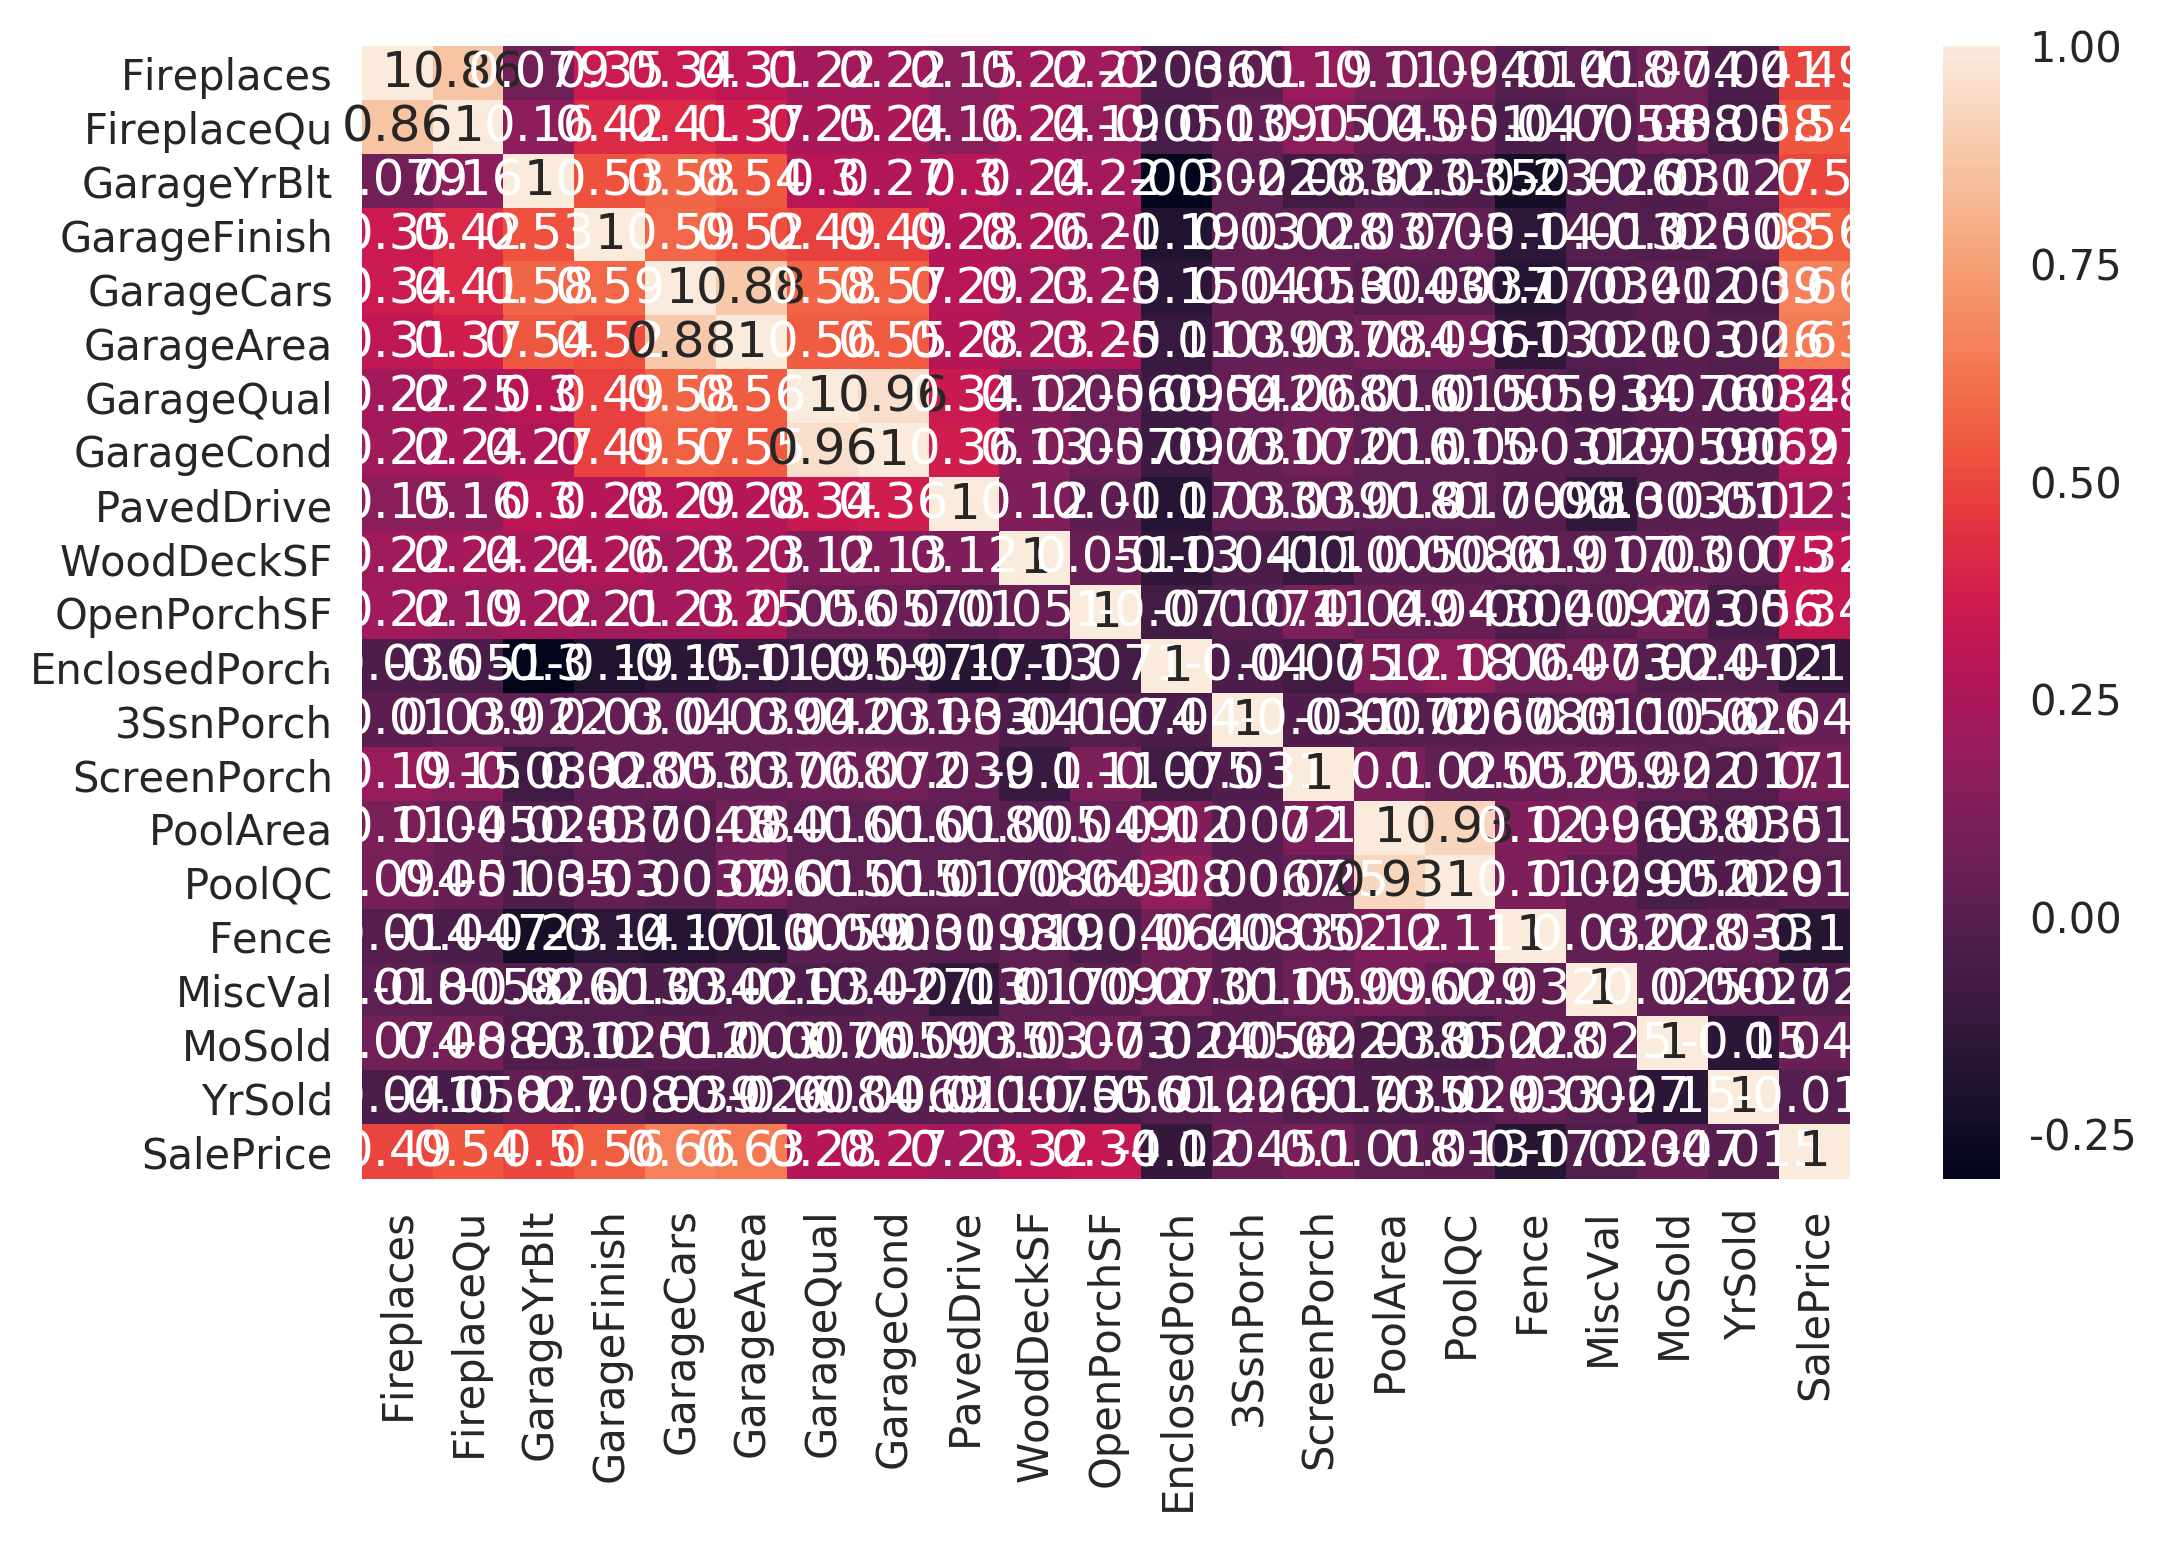

In [90]:
compare_feature_sooner = df_scatr_sooner.corr()
draw = sns.heatmap(compare_feature_sooner, annot = True)
plt.show(draw)

In [91]:
# SalePrice 와의 상관계수만 따로 모음
compare_feature_sooner.loc['SalePrice', :]

Fireplaces       0.494997
FireplaceQu      0.542134
GarageYrBlt      0.497936
GarageFinish     0.560317
GarageCars       0.657427
GarageArea       0.634201
GarageQual       0.280267
GarageCond       0.268731
PavedDrive       0.231872
WoodDeckSF       0.315122
OpenPorchSF      0.338569
EnclosedPorch   -0.119878
3SsnPorch        0.045000
ScreenPorch      0.099935
PoolArea         0.017794
PoolQC           0.012587
Fence           -0.167278
MiscVal         -0.022613
MoSold           0.047261
YrSold          -0.015135
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [95]:
# 필터 0.4 이상 -0.4 이하인것
compare_feature_fillter = ((compare_feature_sooner.SalePrice > 0.4) | (compare_feature_sooner.SalePrice < -0.4))
# 상관계수가 0.4이상 -0.4 이하인 변수들
cols_real_sooner_use = compare_feature_sooner.loc[compare_feature_fillter , compare_feature_fillter]
list(cols_real_sooner_use.keys())# 변수들 리스트
#compare_feature_fillter

['Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'SalePrice']

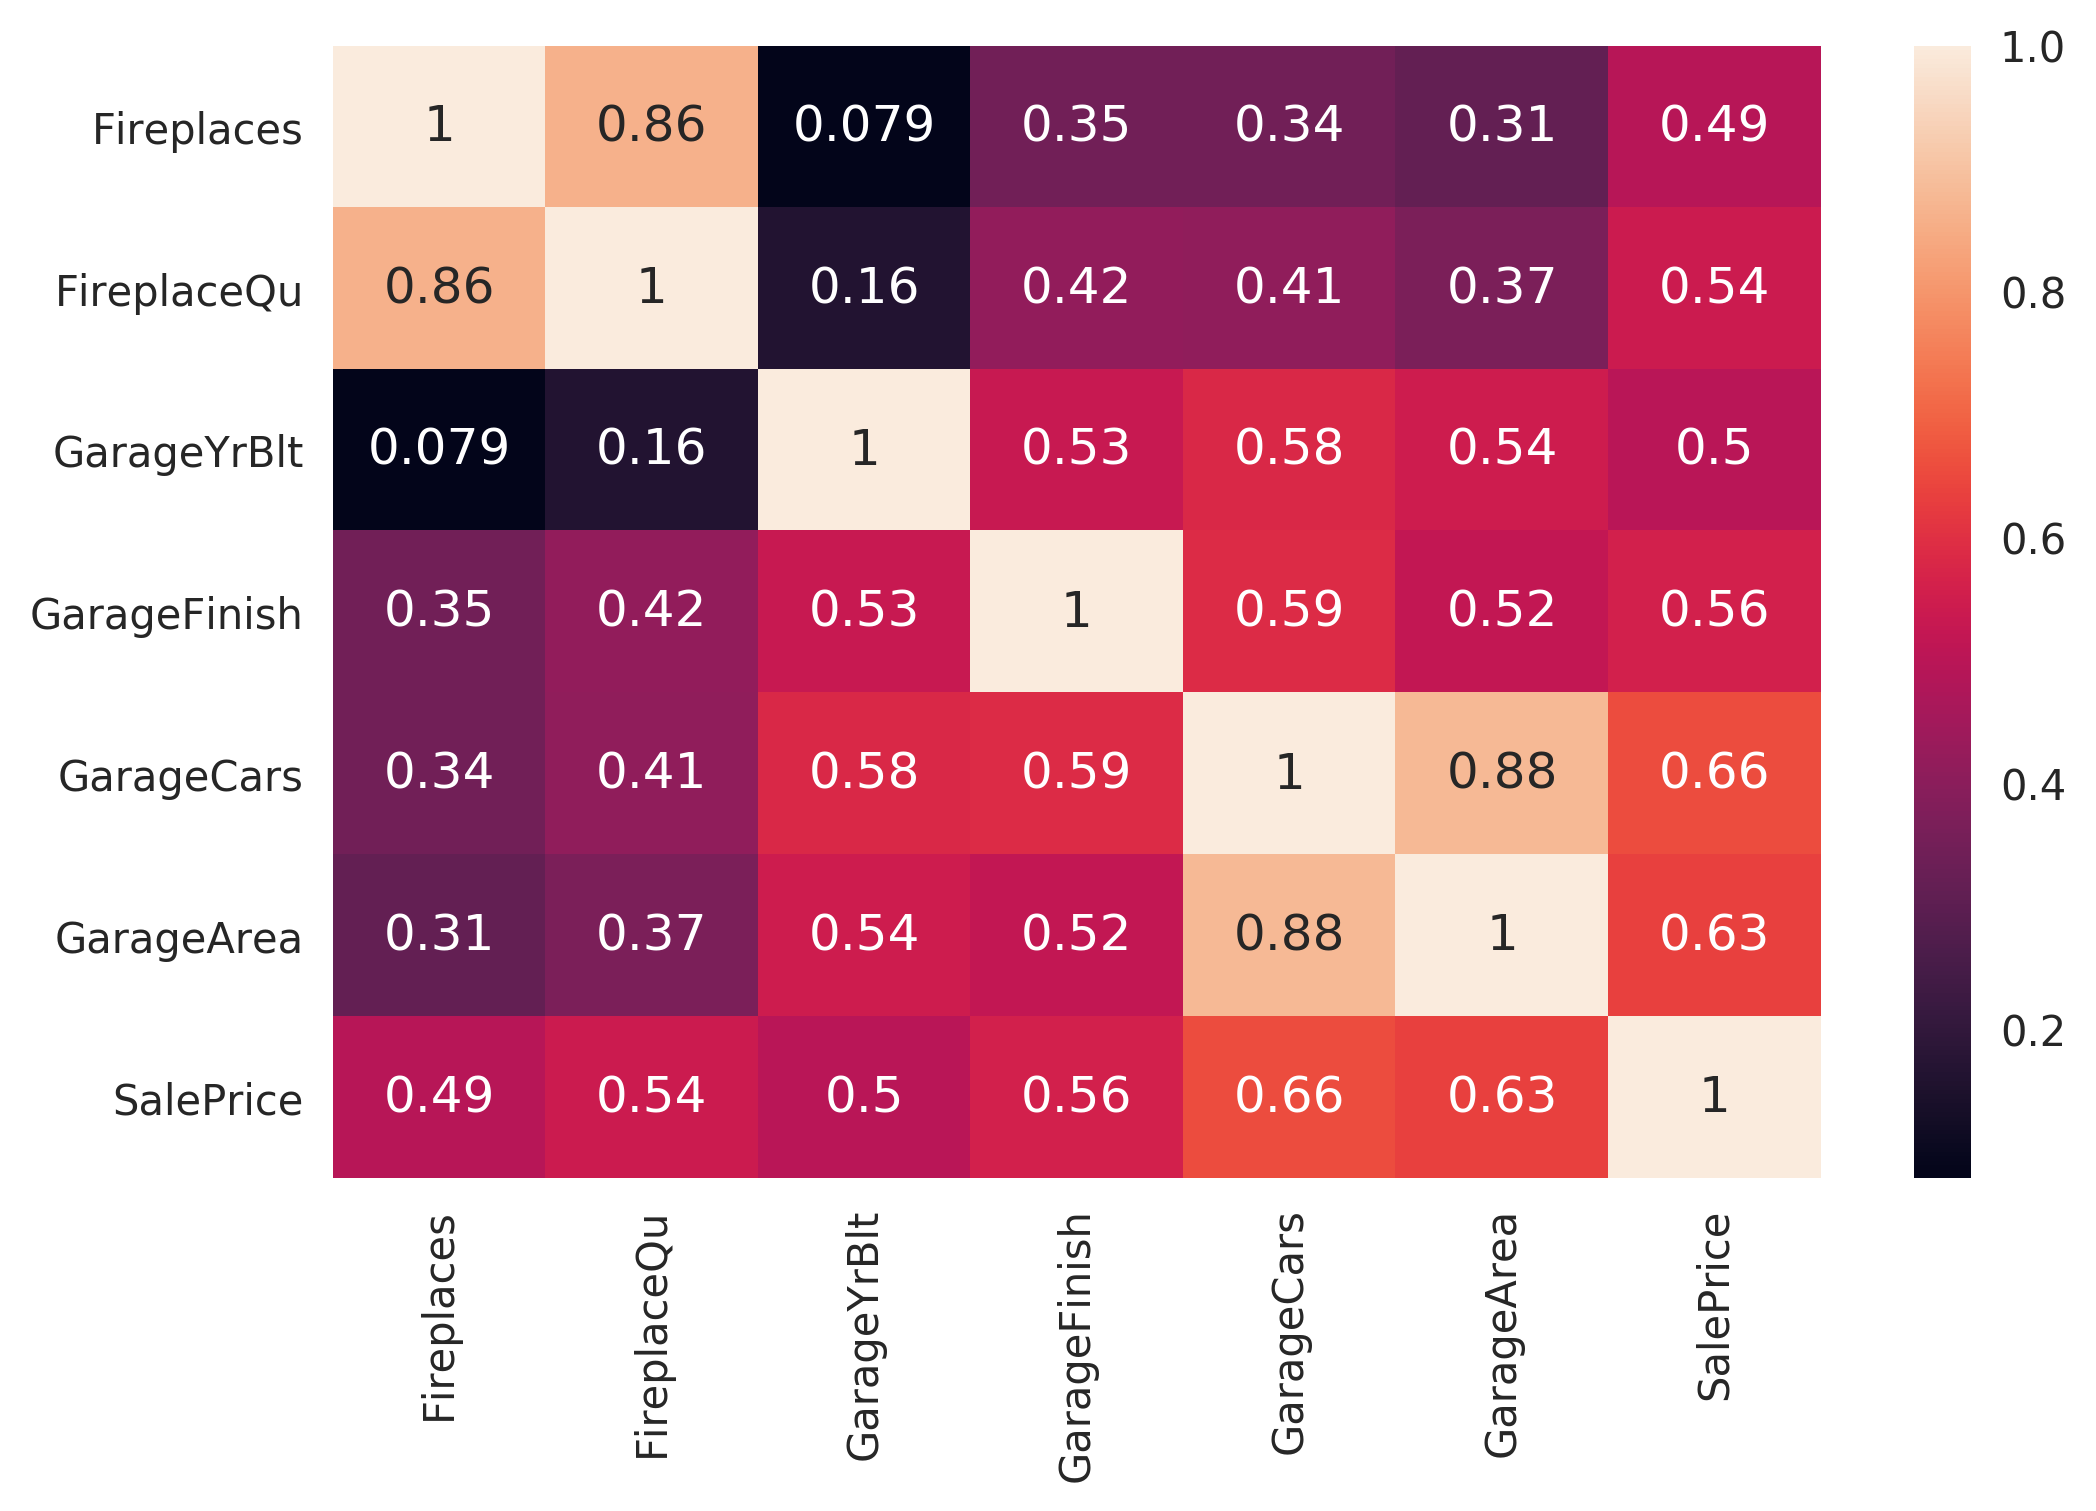

In [93]:
# 이미 구한 상관계수 df에서 쓸것만 뽑아옴 
compare_feature_sooner_use = compare_feature_sooner.loc[list(cols_real_sooner_use.keys()), list(cols_real_sooner_use.keys())]
draw_cols_use = sns.heatmap(compare_feature_sooner_use, annot = True)
plt.show(draw_cols_use)

ValueError: max must be larger than min in range parameter.

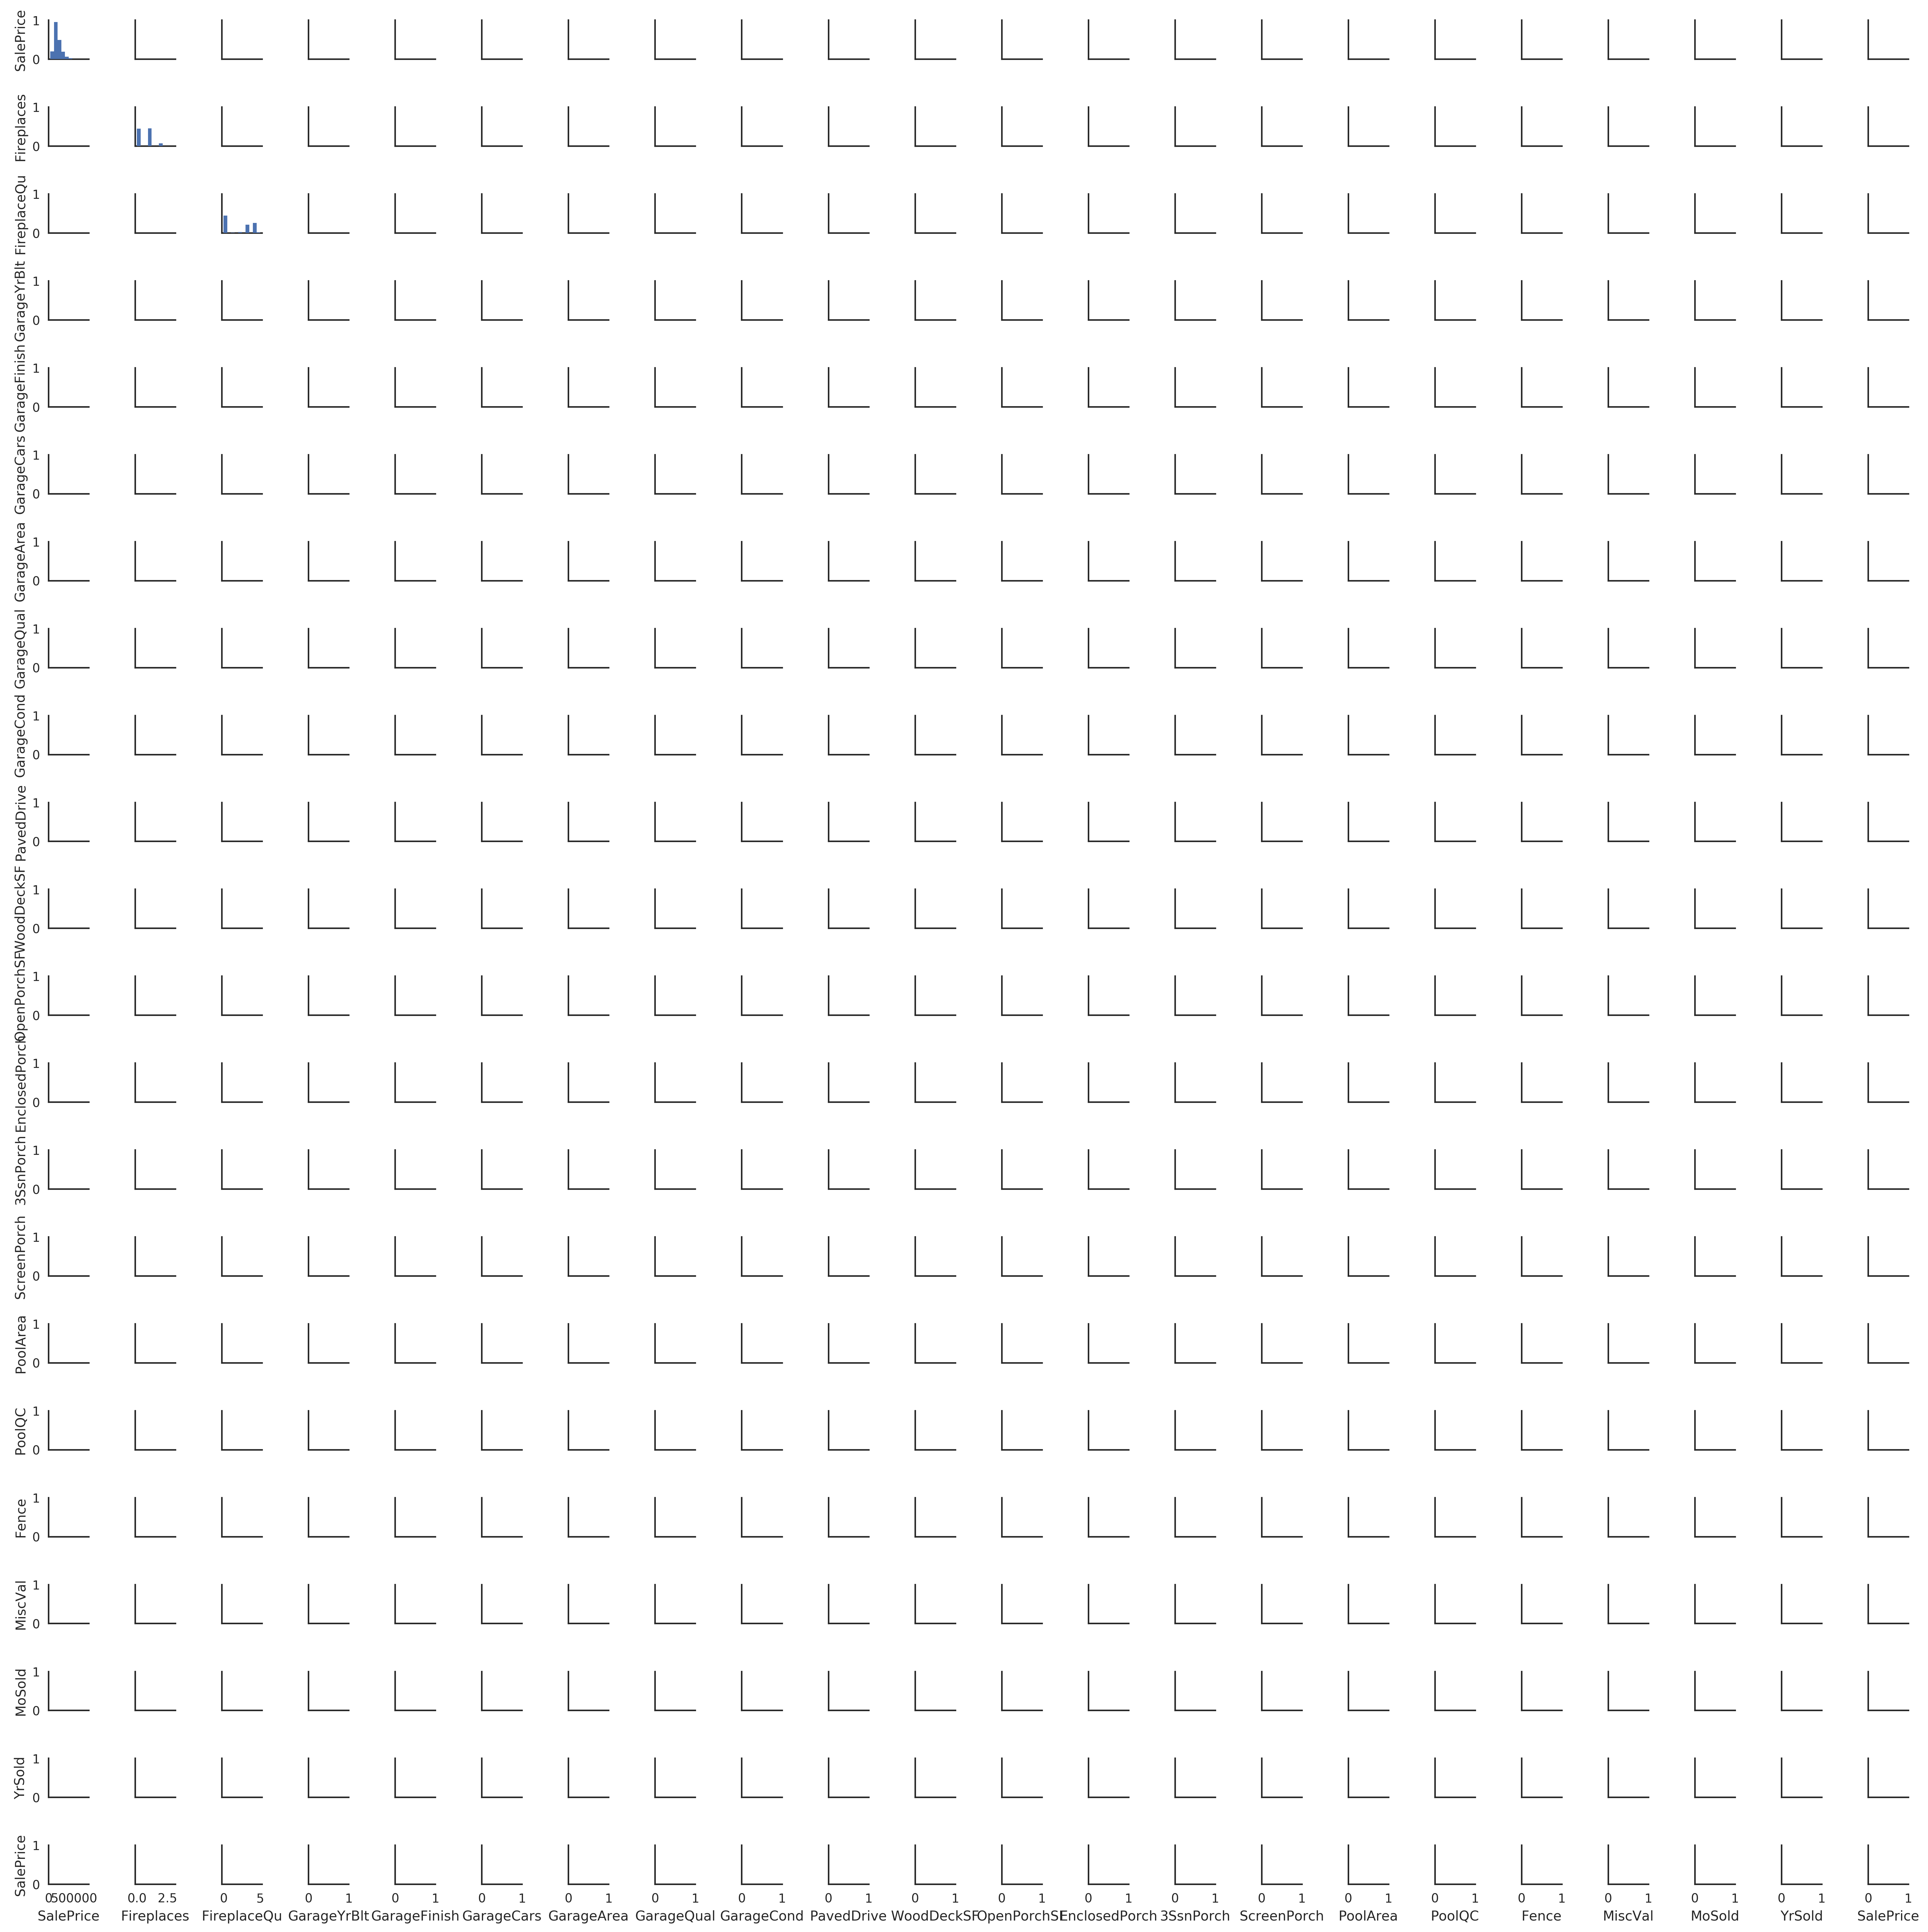

In [117]:
cols_real_var_use = ["Fireplaces", "FireplaceQu", "GarageYrBlt", "GarageFinish", 
                "GarageCars", "GarageArea", "GarageQual","GarageCond", "PavedDrive", 
                "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                 "ScreenPorch", "PoolArea", "PoolQC", "Fence", "MiscVal", "MoSold", 
                   "YrSold", 'SalePrice']

df_scatr_sooner1= df_scatr_sooner.loc[:,cols_real_var_use]
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([df_scatr_sooner1.SalePrice, df_scatr_sooner1[cols_real_var_use[:21]]], axis=1) ,size=1)
plt.show()

## 양적변수 분석결과
#### 분석대상 : 20 개의 변수 ("Fireplaces", "FireplaceQu", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual","GarageCond", "PavedDrive", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "PoolQC", "Fence", "MiscVal", "MoSold", "YrSold", 'SalePrice')

#### 상관계수 결과
* Fireplaces    :   0.494997 | 선택
* FireplaceQu   :   0.542134 | 선택
* GarageYrBlt   :   0.497936 | 선택
* GarageFinish  :   0.560317 | 선택
* GarageCars    :   0.657427 | 선택
* GarageArea    :   0.634201 | 선택


* GarageQual    :   0.280267 | 배제
* GarageCond    :   0.268731 | 배제
* PavedDrive    :   0.231872 | 배제
* WoodDeckSF    :   0.315122 | 배제
* OpenPorchSF   :   0.338569 | 배제
* EnclosedPorch :  -0.119878 | 배제
* 3SsnPorch     :   0.045000 | 배제
* ScreenPorch   :   0.099935 | 배제
* PoolArea      :   0.017794 | 배제
* PoolQC        :   0.012587 | 배제
* Fence         :  -0.167278 | 배제
* MiscVal       :  -0.022613 | 배제
* MoSold        :   0.047261 | 배제
* YrSold        :  -0.015135 | 배제
* SalePrice     :   1.000000 | 배제

### 문제제기

 ##### Fireplaces  , FireplaceQu 
* 하나의 변수로 표현 가능할거 같음
  * FireplaceQu 를 선택
                                       
##### GarageCars , GarageArea 
* 하나의 변수로 표현 가능할거 같음
  * GarageArea 를 선택

#### GarageYrBlt 
* 다른 리모델링 변수나, 준공 년도와의 상관관계를 볼 필요가 있음.
